# 9 – Introdução a Redes Neurais Artificiais

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/fabiobento/ml-dl/blob/main/09_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/fabiobento/ml-dl/blob/main/09_ann.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Introdução

Os pássaros nos inspiraram a voar, as [plantas de bardana](https://pt.wikipedia.org/wiki/Arctium_lappa) inspiraram o Velcro, e a natureza inspirou inúmeras outras invenções. Parece lógico, então, olhar para a arquitetura do cérebro em busca de inspiração sobre como construir uma máquina inteligente. Essa é a lógica que deu origem às **redes neurais artificiais (ANNs)**, modelos de aprendizado de máquina inspirados nas redes de neurônios biológicos encontradas em nossos cérebros. No entanto, embora os aviões tenham sido inspirados pelos pássaros, eles não precisam bater as asas para voar. Da mesma forma, as ANNs tornaram-se gradualmente bastante diferentes de seus primos biológicos. Alguns pesquisadores argumentam até que deveríamos abandonar a analogia biológica completamente (por exemplo, dizendo "unidades" em vez de "neurônios"), para não restringirmos nossa criatividade a sistemas biologicamente plausíveis.

As ANNs estão no cerne do *deep learning* (aprendizado profundo). Elas são versáteis, poderosas e escaláveis, tornando-as ideais para lidar com tarefas de aprendizado de máquina grandes e altamente complexas, como classificar bilhões de imagens (por exemplo, Google Images), alimentar serviços de reconhecimento de fala (por exemplo, a Siri da Apple ou o Google Assistant) e chatbots (por exemplo, ChatGPT ou Claude), recomendar os melhores vídeos para centenas de milhões de usuários assistirem todos os dias (por exemplo, YouTube), ou aprender como as proteínas se dobram (o AlphaFold da DeepMind).

Esta aula introduz as redes neurais artificiais, começando com um rápido tour pelas primeiras arquiteturas de ANN e levando até os **perceptrons multicamadas (MLPs)**, que são amplamente utilizados hoje (muitas outras arquiteturas serão exploradas nas aulas seguintes). Nesta aula, implementaremos MLPs simples usando o Scikit-Learn para nos familiarizarmos, e na próximo Aula mudaremos para o PyTorch, pois é uma biblioteca muito mais flexível e eficiente para redes neurais.

## Configuração do ambiente para o notebook

Esse notebook precisa de Python 3.10 ou superior:

In [54]:
import sys

assert sys.version_info >= (3, 10)

Ele também precisa de Scikit-Learn ≥ 1.6.1:

In [55]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

Vamos definir os tamanhos padrões de fonte:

In [56]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## De neurônios biológicos a neurônios artificiais

Surpreendentemente, as ANNs existem há bastante tempo: elas foram introduzidas pela primeira vez em 1943 pelo neurofisiologista Warren McCulloch e pelo matemático Walter Pitts. Em seu [artigo histórico](https://homl.info/43), "*A Logical Calculus of Ideas Immanent in Nervous Activity*", McCulloch e Pitts apresentaram um modelo computacional simplificado de como os neurônios biológicos poderiam trabalhar juntos em cérebros animais para realizar cálculos complexos usando lógica proposicional. Esta foi a primeira arquitetura de rede neural artificial. Desde então, muitas outras arquiteturas foram inventadas, como você verá.

Os primeiros sucessos das ANNs levaram à crença generalizada de que em breve estaríamos conversando com máquinas verdadeiramente inteligentes. Quando ficou claro na década de 1960 que essa promessa não seria cumprida (pelo menos por um bom tempo), o financiamento foi destinado a outros lugares, e as ANNs entraram em um longo inverno. No início da década de 1980, novas arquiteturas foram inventadas e melhores técnicas de treinamento foram desenvolvidas, provocando um renascimento do interesse no *conexionismo*, o estudo das redes neurais. Mas o progresso foi lento e, na década de 1990, outras técnicas poderosas de aprendizado de máquina haviam sido inventadas, como as máquinas de vetores de suporte (SVMs). Essas técnicas pareciam oferecer melhores resultados e fundamentos teóricos mais sólidos do que as ANNs, então, mais uma vez, o estudo das redes neurais foi colocado em espera.

### Neurônios Biológicos

Antes de discutirmos os neurônios artificiais, vamos dar uma olhada rápida em um neurônio biológico representado na [Figura 9-1](#figure-9-1). É uma célula de aparência incomum encontrada principalmente em cérebros animais. É composta por um *corpo celular* contendo o núcleo e a maioria dos componentes complexos da célula, muitas extensões ramificadas chamadas *dendritos*, além de uma extensão muito longa chamada *axônio*. O comprimento do axônio pode ser apenas algumas vezes maior que o corpo celular, ou até dezenas de milhares de vezes maior. Perto de sua extremidade, o axônio se divide em muitos ramos chamados *telodendritos*, e na ponta desses ramos existem estruturas minúsculas chamadas *terminais sinápticos* (ou simplesmente *sinapses*), que estão conectadas aos dendritos ou corpos celulares de outros neurônios. Os neurônios biológicos produzem impulsos elétricos curtos chamados *potenciais de ação* (APs, ou apenas *sinais*), que viajam ao longo dos axônios e fazem com que as sinapses liberem sinais químicos chamados *neurotransmissores*. Quando um neurônio recebe uma quantidade suficiente desses neurotransmissores em poucos milissegundos, ele dispara seus próprios impulsos elétricos (na verdade, isso depende dos neurotransmissores, pois alguns deles inibem o disparo do neurônio).

<a id="figure-9-1"></a>


![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-1.png)

**Figura 9-1 - Um neurônio biológico.** ([Fonte](https://en.wikipedia.org/wiki/Neuron))


Assim, neurônios biológicos individuais parecem se comportar de maneira simples, mas estão organizados em uma vasta rede de bilhões, com cada neurônio tipicamente conectado a milhares de outros neurônios. Cálculos altamente complexos podem ser realizados por uma rede de neurônios bastante simples, assim como um formigueiro complexo pode emergir dos esforços combinados de formigas simples. A arquitetura das *redes neurais biológicas* (BNNs) é objeto de pesquisa ativa, mas algumas partes do cérebro já foram mapeadas. Esses esforços mostram que os neurônios são frequentemente organizados em camadas consecutivas, especialmente no *córtex cerebral* (a camada externa do cérebro), conforme mostrado na [Figura 9-2](#figure-9-2).

<a id="figure-9-2"></a>
![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-2.png)

**Figura 9-2 - Múltiplos neurônios em uma rede neural biológica.** ([Fonte](https://en.wikipedia.org/wiki/Cerebral_cortex))

### Cálculos Lógicos com Neurônios

McCulloch e Pitts propuseram um modelo muito simples do neurônio biológico, que mais tarde ficou conhecido como *neurônio artificial*: ele possui uma ou mais entradas binárias (ligado/desligado) e uma saída binária. O neurônio artificial ativa sua saída quando mais de um certo número de suas entradas estão ativas. Em seu artigo, McCulloch e Pitts mostraram que, mesmo com um modelo tão simplificado, é possível construir uma rede de neurônios artificiais capaz de calcular qualquer proposição lógica que você desejar. Para ver como tal rede funciona, vamos construir algumas ANNs que realizam vários cálculos lógicos (ver [Figura 9-3](#figure-9-3)), assumindo que um neurônio é ativado quando pelo menos duas de suas conexões de entrada estão ativas.

<a id="figure-9-3"></a>
![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-3.png)

**Figura 9-3 - ANNs realizando cálculos lógicos simples.** ([Fonte](https://ageron.github.io/))

Vamos ver o que essas redes fazem:

*   A primeira rede à esquerda é a função identidade: se o neurônio A for ativado, então o neurônio C também será ativado (já que ele recebe dois sinais de entrada do neurônio A); mas se o neurônio A estiver desligado, então o neurônio C também estará desligado.
*   A segunda rede realiza um AND lógico: o neurônio C é ativado apenas quando ambos os neurônios A e B estão ativados (um único sinal de entrada não é suficiente para ativar o neurônio C).
*   A terceira rede realiza um OR lógico: o neurônio C é ativado se o neurônio A ou o neurônio B estiver ativado (ou ambos).
*   Finalmente, se supusermos que uma conexão de entrada pode inibir a atividade do neurônio (o que é o caso dos neurônios biológicos), então a quarta rede calcula uma proposição lógica um pouco mais complexa: o neurônio C é ativado apenas se o neurônio A estiver ativo e o neurônio B estiver desligado. Se o neurônio A estiver ativo o tempo todo, então você obtém um NOT lógico: o neurônio C está ativo quando o neurônio B está desligado, e vice-versa.

Você pode imaginar como essas redes podem ser combinadas para calcular expressões lógicas complexas (veja os exercícios no final da aula para um exemplo).

### O Perceptron

O *Perceptron* é uma das arquiteturas de ANN mais simples, inventada em 1957 por Frank Rosenblatt. É baseado em um neurônio artificial ligeiramente diferente (ver [Figura 9-4](#figure-9-4)) chamado de *unidade lógica de limiar* (TLU - *threshold logic unit*), ou às vezes *unidade de limiar linear* (LTU). As entradas e a saída são números (em vez de valores binários ligado/desligado), e cada conexão de entrada está associada a um peso. A TLU primeiro calcula uma função linear de suas entradas: $z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n + b = w^⊺ x + b$. Em seguida, aplica uma função de degrau (*step function*) ao resultado: $step(x)=h_w(x) = step(z)$(ver [Figura 9-4-1](#figure-9-4-1)). Portanto, é quase como uma regressão logística, exceto que usa uma função de degrau em vez da [função logística](./04_training_linear_models.ipynb). Assim como na regressão logística, os parâmetros do modelo são os pesos de entrada $w$ e o termo de viés $b$.

![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-4-1.png)

**Figura 9-4-1. Uma função de limiar gerando uma fronteira de decisão linear para um problema de classificação binária** ([Fonte](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html))


![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-4.png)

**Figura 9-4. TLU: um neurônio artificial que calcula uma soma ponderada de suas entradas $w^⊺ x$, mais um termo de viés $b$, e então aplica uma função de degrau**([Fonte](https://ageron.github.io/))


A função de degrau mais comum usada em Perceptrons é a função de degrau de Heaviside (ver [Equação 9-1](#equation-9-1)). Às vezes, a função de sinal é usada em seu lugar.

<a id="equation-9-1"></a>


**Equação 9-1. Funções de degrau comuns usadas em Perceptrons (assumindo limiar = 0)**

$$
\text{heaviside}(z) =
\begin{cases}
0 & \text{se } z < 0 \\
1 & \text{se } z \ge 0
\end{cases}
$$

$$
\text{sgn}(z) =
\begin{cases}
-1 & \text{se } z < 0 \\
0 & \text{se } z = 0 \\
+1 & \text{se } z > 0
\end{cases}
$$

Uma única TLU pode ser usada para classificação binária linear simples. Ela calcula uma função linear de suas entradas e, se o resultado exceder um limite, ela gera a classe positiva. Caso contrário, ela produz a classe negativa. Isso pode lembrá-lo da [regressão logística](./04_training_linear_models.ipynb) ou da classificação [SVM linear](./Appendix_C_support_vector_machines.ipynb). Você poderia, por exemplo, usar uma única TLU para classificar [flores de íris](https://archive.ics.uci.edu/ml/datasets/iris) com base no comprimento e na largura das pétalas. O treinamento de tal TLU exigiria encontrar os valores corretos para w1, w2 e b (o algoritmo de treinamento será discutido em breve).

Um Perceptron é composto por uma ou mais TLUs organizadas em uma única camada, onde cada TLU está conectada a todas as entradas. Tal camada é chamada de *camada totalmente conectada* (*fully connected layer*), ou *camada densa* (*dense layer*). As entradas constituem a *camada de entrada* (*input layer*). E, como a camada de TLUs produz as saídas finais, ela é chamada de *camada de saída* (*output layer*). Por exemplo, um Perceptron com duas entradas e três saídas é representado na [Figura 9-5](#figure-9-5).

<a id="figure-9-5"></a>
![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-5.png)

**Figura 9-5. Arquitetura de um Perceptron com duas entradas e três neurônios de saída**([Fonte](https://ageron.github.io/))

Este Perceptron pode classificar instâncias simultaneamente em três classes binárias diferentes, o que o torna um classificador *multilabel* (multirrótulo). Ele também pode ser usado para classificação multiclasse.

Graças à magia da álgebra linear, a [Equação 9-2](#equation-9-2) pode ser usada para calcular eficientemente as saídas de uma camada de neurônios artificiais para várias instâncias de uma só vez.

<a id="equation-9-2"></a>
**Equação 9-2. Computando as saídas de uma camada totalmente conectada**

$$
\widehat{Y} = \phi(XW + b)
$$

Nesta equação:

*   $\widehat{Y}$ é a matriz de saída. Ela tem uma linha por instância e uma coluna por neurônio.
*   $X$ é a matriz de entrada. Ela tem uma linha por instância e uma coluna por característica de entrada.
*   A matriz de pesos $W$ contém todos os pesos das conexões. Ela tem uma linha por característica de entrada e uma coluna por neurônio.
*   O vetor de viés $b$ contém todos os termos de viés: um por neurônio.
*   A função $\phi$ é chamada de *função de ativação*: quando os neurônios artificiais são TLUs, ela é uma função de degrau (discutiremos outras funções de ativação em breve).

> Em matemática, a soma de uma matriz e um vetor é indefinida. No entanto, na ciência de dados, permitimos a “difusão”: adicionar um vetor a uma matriz significa adicioná-lo a todas as linhas da matriz. Portanto, $XW + b$ primeiro multiplica $X$ por $W$ — o que resulta em uma matriz com uma linha por instância e uma coluna por saída — e, em seguida, adiciona o vetor $b$ a cada linha dessa matriz, o que adiciona cada termo de viés à saída correspondente, para cada instância. Além disso, ϕ é então aplicado item por item a cada item na matriz resultante.

#### A regra de aprendizado do perceptron

Então, como um Perceptron é treinado?
- O algoritmo de treinamento do Perceptron proposto por Rosenblatt foi amplamente inspirado na regra de Hebb.
    - Em seu livro de 1949, *The Organization of Behavior* (Wiley), Donald Hebb sugeriu que quando um neurônio biológico dispara outro neurônio, frequentemente, a conexão entre esses dois neurônios se torna mais forte.
- Siegrid Löwel mais tarde resumiu a ideia de Hebb na frase cativante:
    - "Células que disparam juntas, conectam-se juntas"; isto é, o peso da conexão entre dois neurônios tende a aumentar quando eles disparam simultaneamente.
    - Esta regra ficou conhecida mais tarde como *regra de Hebb* (ou aprendizado Hebbiano).

Perceptrons são treinados usando uma variante dessa regra que leva em conta o erro cometido pela rede quando ela faz uma previsão:
- a regra de aprendizado do Perceptron reforça as conexões que ajudam a reduzir o erro.
- Mais especificamente, o Perceptron é alimentado com uma instância de treinamento por vez e, para cada instância, ele faz suas previsões.

Para cada neurônio de saída que produziu uma previsão errada, ele reforça os pesos das conexões das entradas que teriam contribuído para a previsão correta. A regra é mostrada na [Equação 9-3](#equation-9-2).

<a id="equation-9-2"></a>
**Equação 9-3. Regra de aprendizado do Perceptron (atualização de pesos)**

$$
w_{i,j}^{(\text{next step})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$$

Nesta equação:

*   $w_{i,j}$ é o peso da conexão entre a $i$-ésima entrada e o $j$-ésimo neurônio.
*   $x_i$ é o $i$-ésimo valor de entrada da instância de treinamento atual.
*   $\hat{y}_j$ é a saída do $j$-ésimo neurônio de saída para a instância de treinamento atual.
*   $y_j$ é a saída alvo do $j$-ésimo neurônio de saída para a instância de treinamento atual.
*   $\eta$ é a taxa de aprendizado (*learning rate*).

A ideia central por trás do neurônio artificial e do modelo de perceptron com limiar de Rosenblatt é usar uma abordagem reducionista para imitar como um único neurônio no cérebro funciona: ele dispara ou não dispara. 

É importante notar que a convergência de cada unidade de uma rede perceptron é garantida apenas se as duas classes vinculadas a ela forem linearmente separáveis, o que significa que as duas classes podem ser perfeitamente separadas por uma fronteira de decisão linear.
- Se as duas classes não puderem ser separadas por uma fronteira de decisão linear, podemos definir um número máximo de passagens pelo conjunto de dados de treinamento (épocas) e/ou um limiar para o número de classificações incorretas toleradas — caso contrário, o perceptron nunca pararia de atualizar os pesos.

Como a fronteira de decisão do Perceptron é linear, sua capacidade de aprender padrões complexos é limitada, assemelhando-se à regressão logística. Entretanto, Rosenblatt demonstrou que o algoritmo converge para uma solução caso os dados sejam linearmente separáveis, resultado conhecido como *teorema da convergência do Perceptron*.
- Assim, a convergência só é garantida se existir uma fronteira linear capaz de separar perfeitamente as classes. A prova deste teorema pode ser consultada [nestas notas de aula](https://sebastianraschka.com/pdf/lecture-notes/stat453ss21/L03_perceptron_slides.pdf).

A [Figura 9-5-1](#figure-9-5-1)mostra exemplos de cenários limearmente separáveis e não separáveis

![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-5-1.png)

**Figura 9-5-1. Exemplos de classes linearmente e não linearmente separáveis** ([Fonte](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html))



Se as duas classes não puderem ser separadas por uma fronteira de decisão linear, podemos definir um número máximo de passagens pelo conjunto de dados de treinamento (épocas) e/ou um limite para o número de classificações incorretas toleradas — caso contrário, o perceptron nunca pararia de atualizar os pesos.

Agora, antes de passarmos para a implementação na próxima seção, o que você acabou de aprender pode ser resumido em um diagrama simples que ilustra o conceito geral do perceptron. O diagrama mostra como o perceptron recebe as entradas de um exemplo ($\mathbf{x}$) e as combina com a unidade de viés ($b$) e pesos ($\mathbf{w}$) para calcular a entrada líquida. A entrada líquida é então passada para a função de limiar, que gera uma saída binária de 0 ou 1 — o rótulo de classe previsto do exemplo. Durante a fase de aprendizado, essa saída é usada para calcular o erro da previsão e atualizar os pesos e a unidade de viés.

![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-5-2.png)

**Figura 9-5-2. Os pesos e o viés do modelo são atualizados com base na função de erro** ([Fonte](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html))




### Implementando algoritmos de aprendizado para perceptron de *Rosenblatt* em Python

#### Uma API orientado a objetos para o perceptron

Aprendemos como a regra do perceptron de Rosenblatt funciona; vamos agora implementá-la em Python e aplicá-la ao [conjunto de dados Iris](https://archive.ics.uci.edu/dataset/53/iris).

---

> **Observações sobre o conjunto de dados Iris:**
> 
> O site original e repositório oficial para encontrar o Iris dataset é o *UCI > > Machine Learning Repository*, mantido pela Universidade da Califórnia, Irvine.
> 
> Embora o conjunto de dados tenha sido originalmente publicado pelo estatístico e biólogo Ronald Fisher em seu artigo de 1936, "The Use of Multiple Measurements in Taxonomic Problems", foi o repositório da UCI que o popularizou como um benchmark fundamental para a comunidade de aprendizado de máquina.
> 
> **Detalhes do Repositório**
> - Nome: UCI Machine Learning Repository
> - URL Oficial: https://archive.ics.uci.edu/ml/datasets/iris
> - Data de Doação: 30 de junho de 1988
> 
> **Sobre o Dataset**
> O conjunto de dados é composto por 150 instâncias (amostras) de flores Iris, divididas igualmente entre três espécies: Iris setosa, Iris versicolor e Iris virginica.
> 
> Para cada amostra, são medidas quatro características (atributos):
> 1. Comprimento da sépala (cm)
> 2. Largura da sépala (cm)
> 3. Comprimento da pétala (cm)
> 4. Largura da pétala (cm)
> 
> Hoje em dia, por ser um "clássico", ele já vem embutido em diversas bibliotecas de programação, como o scikit-learn no Python (`sklearn.datasets.load_iris()`)

---

Adotaremos uma abordagem orientada a objetos para definir a interface do perceptron como uma classe Python, o que nos permitirá inicializar novos objetos Perceptron que podem aprender a partir de dados por meio de um método fit e fazer previsões por meio de um método predict separado.

Por convenção, anexamos um sublinhado (_) a atributos que não são criados na inicialização do objeto, mas sim através da chamada de outros métodos do objeto, por exemplo, `self.w_`.

In [57]:
import numpy as np


class Perceptron:
    """Classificador Perceptron.

    Parâmetros
    ------------
    eta : float
      Taxa de aprendizado (entre 0.0 e 1.0)
    n_iter : int
      Número de passagens sobre o conjunto de dados de treinamento (épocas).
    random_state : int
      Semente do gerador de números aleatórios para inicialização de pesos aleatórios.

    Atributos
    -----------
    w_ : array-1d
      Pesos após o ajuste.
    b_ : Escalar
      Unidade de viés (bias) após o ajuste.
    errors_ : lista
      Número de classificações incorretas (atualizações) em cada época.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Ajusta aos dados de treinamento.

        Parâmetros
        ----------
        X : {semelhante a array}, formato = [n_exemplos, n_recursos]
          Vetores de treinamento, onde n_exemplos é o número de exemplos e
          n_recursos é o número de recursos (características).
        y : semelhante a array, formato = [n_exemplos]
          Valores alvo.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calcula a entrada de rede"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Retorna o rótulo da classe após o degrau unitário"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

Usando esta implementação do perceptron, agora podemos inicializar novos objetos `Perceptron` com uma determinada taxa de aprendizado, `eta` ($\eta$), e o número de épocas, `n_iter` (passagens pelo conjunto de dados de treinamento).

Através do método `fit`, inicializamos o viés `self.b_` com um valor inicial de 0 e os pesos em `self.w_` para um vetor em $\mathbb{R}^m$, onde $m$ representa o número de dimensões (características) no conjunto de dados.

Observe que o vetor de pesos inicial contém pequenos números aleatórios extraídos de uma distribuição normal com um desvio padrão de 0,01 via `rgen.normal(loc=0.0, scale=0.01, size=X.shape)`, onde `rgen` é um gerador de números aleatórios do NumPy que semeamos com uma semente aleatória especificada pelo usuário para que possamos reproduzir os resultados anteriores, se desejado.

Tecnicamente, poderíamos inicializar os pesos com zero (de fato, isso é feito no algoritmo original do perceptron). No entanto, se fizéssemos isso, a taxa de aprendizado $\eta$ (`eta`) não teria efeito sobre a fronteira de decisão. Se todos os pesos forem inicializados com zero, o parâmetro da taxa de aprendizado, `eta`, afeta apenas a escala do vetor de pesos, não a direção.

Se você está familiarizado com trigonometria, considere um vetor $v1 =$, onde o ângulo entre $v1$ e um vetor $v2 = 0.5 \times v1$ seria exatamente zero, conforme demonstrado pelo seguinte trecho de código:

In [58]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

np.float64(0.0)

Aqui, `np.arccos` é o inverso trigonométrico do cosseno, e `np.linalg.norm` é uma função que calcula o comprimento de um vetor. (Nossa decisão de extrair os números aleatórios de uma distribuição normal aleatória — por exemplo, em vez de uma distribuição uniforme — e usar um desvio padrão de 0,01 foi arbitrária; lembre-se, estamos interessados apenas em pequenos valores aleatórios para evitar as propriedades de vetores compostos apenas por zeros, conforme discutido anteriormente).

Como um exercício opcional após a leitura desta aula, você pode alterar `self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])` para `self.w_ = np.zeros(X.shape[1])` e executar o código de treinamento do perceptron apresentado na próxima seção com diferentes valores para `eta`. Você observará que a fronteira de decisão não muda.

---

> **Indexação de arrays NumPy**
> 
> A indexação NumPy para arrays unidimensionais funciona de forma semelhante às listas Python usando a notação de colchetes (`[]`). Para arrays bidimensionais, o primeiro indexador refere-se ao número da linha e o segundo indexador ao número da coluna. Por exemplo, usaríamos `X[2, 3]` para selecionar a terceira linha e a quarta coluna de um array bidimensional, `X`.

---

Após os pesos terem sido inicializados, o método `fit` itera sobre todos os exemplos individuais no conjunto de dados de treinamento e atualiza os pesos de acordo com a regra de aprendizagem do perceptron que discutimos na seção anterior.

Os rótulos das classes são previstos pelo método `predict   `, que é chamado no método `fit` durante o treinamento para obter o rótulo da classe para a atualização dos pesos; mas o `predict` também pode ser usado para prever os rótulos das classes de novos dados após termos ajustado nosso modelo. Além disso, também coletamos o número de classificações incorretas durante cada época na lista `self.errors_` para que possamos analisar posteriormente o quão bem nosso perceptron se saiu durante o treinamento. A função `np.dot` que é usada no método `net_input` simplesmente calcula o produto escalar vetorial, $w^{T}x + b$.

---

> **Vetorização: Substituindo loops for por código vetorizado**
> 
> Em vez de usar o NumPy para calcular o produto escalar vetorial entre dois arrays, a e b, via `a.dot(b)` ou `np.dot(a, b)`, também poderíamos realizar o cálculo em Python puro via `sum([i * j for i, j in zip(a, b)])`.
> 
> No entanto, a vantagem de usar o NumPy sobre as estruturas clássicas de loop `for` do Python é que suas operações aritméticas são vetorizadas.
> 
> Vetorização significa que uma operação aritmética elementar é aplicada automaticamente a todos os elementos de um array.
> 
> Ao formular nossas operações aritméticas como uma sequência de instruções em um array, em vez de realizar um conjunto de operações para cada elemento por vez, podemos fazer melhor uso de nossas arquiteturas modernas de unidade central de processamento (*central processing unit* - CPU) com suporte a instrução única, múltiplos dados (*single instruction, multiple data* - SIMD).
> 
> Além disso, o NumPy usa bibliotecas de álgebra linear altamente otimizadas, como Basic Linear Algebra Subprograms (*Basic Linear Algebra Subprograms*-BLAS) e Linear Algebra Package (*Linear Algebra Package*-LAPACK), que foram escritas em C ou Fortran.
> 
> Por fim, o NumPy também nos permite escrever nosso código de uma forma mais compacta e intuitiva usando os fundamentos da álgebra linear, como produtos escalares de vetores e matrizes.

---

#### Treinando o modelo perceptron de *Rosenblatt* no conjunto de dados Iris com Python

Para testar nossa implementação do perceptron, restringiremos as análises e exemplos a seguir no restante deste notebook a duas variáveis de características (dimensões). Embora a regra do perceptron não seja restrita a duas dimensões, considerar apenas duas características:
- comprimento da sépala e
- comprimento da pétala

Essa simplificação nos permitirá visualizar as regiões de decisão do modelo treinado em um gráfico de dispersão para fins de aprendizado.

Note que também consideraremos apenas duas classes de flores, setosa e versicolor, do conjunto de dados Iris por razões práticas — lembre-se, o perceptron é um classificador binário. No entanto, o algoritmo perceptron pode ser estendido para classificação multiclasse — por exemplo, a técnica um-contra-todos (*one-versus-all*-OvA).

---

> **O método OvA para classificação multiclasse**
> 
> OvA, que às vezes também é chamado de um-contra-o-resto (*one-versus-rest*-OvR), é uma técnica que nos permite estender qualquer classificador binário para problemas multiclasse.
> 
> Usando OvA, podemos treinar um classificador por classe, onde a classe específica é tratada como a classe positiva e os exemplos de todas as outras classes são considerados classes negativas.
> 
> Se fôssemos classificar uma nova instância de dados não rotulada, usaríamos nossos n classificadores, onde n é o número de rótulos de classe, e atribuiríamos o rótulo de classe com a maior probabilidade à instância específica que queremos classificar.
> 
> No caso do perceptron, usaríamos OvA para escolher o rótulo de classe que está associado ao maior valor absoluto de entrada líquida.

---

Primeiro, usaremos a biblioteca pandas para carregar o conjunto de dados Iris diretamente do [*UCI Machine Learning Repository*](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) em um objeto DataFrame e imprimir as últimas cinco linhas por meio do método tail para verificar se os dados foram carregados corretamente:

In [59]:
import os
import pandas as pd
from urllib.error import HTTPError

try:
    # URL do dataset Iris no Repositório de Machine Learning da UCI
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('Pela URL:', s)
    
    # Tentativa de ler os dados CSV diretamente da URL
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    # Alternativa: carregar o dataset de um arquivo local caso a URL esteja indisponível
    s = 'iris.data'
    print('Pelo caminho local:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

# Exibir as últimas cinco entradas para verificar a estrutura dos dados
df.tail()

Pela URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Em seguida, extraímos os primeiros 100 rótulos de classe que correspondem às 50 flores `Iris-setosa` e 50 `Iris-versicolor` e convertemos os rótulos de classe em dois rótulos inteiros, 1 (`versicolor`) e 0 (`setosa`), que atribuímos a um vetor, `y`, onde o método `values` de um `DataFrame` do pandas retorna a representação NumPy correspondente.

Da mesma forma, extraímos a primeira coluna de características (comprimento da sépala) e a terceira coluna de características (comprimento da pétala) desses 100 exemplos de treinamento e os atribuímos a uma matriz de características, `X`, que podemos visualizar por meio de um gráfico de dispersão bidimensional:

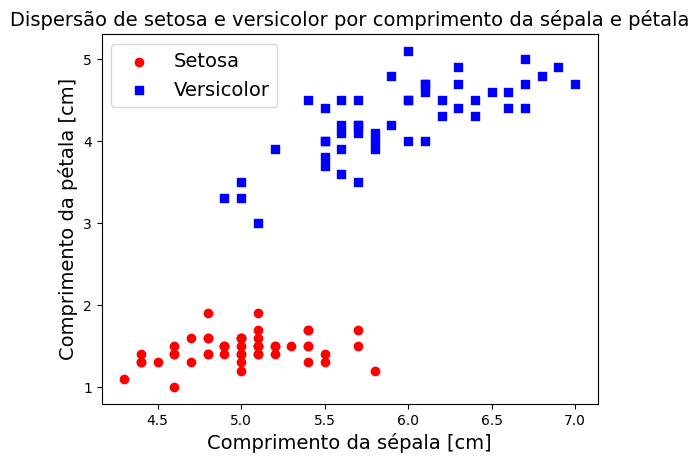

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Seleciona as classes Setosa e Versicolor
y = df.iloc[0:100, 4].values
# Converte os rótulos: 'Iris-setosa' para 0 e as demais para 1
y = np.where(y == 'Iris-setosa', 0, 1)

# Extrai o comprimento da sépala (coluna 0) e o comprimento da pétala (coluna 2)
X = df.iloc[0:100, [0, 2]].values

# Plota os dados no gráfico de dispersão
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

# Define os rótulos dos eixos e a posição da legenda
plt.xlabel('Comprimento da sépala [cm]')
plt.ylabel('Comprimento da pétala [cm]')
plt.legend(loc='upper left')
plt.title('Dispersão de setosa e versicolor por comprimento da sépala e pétala')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

O gráfico acima mostra a distribuição dos exemplos de flores no conjunto de dados Iris ao longo dos dois eixos de características: comprimento da pétala e comprimento da sépala (medidos em centímetros).

Neste subespaço de características bidimensional, podemos ver que uma fronteira de decisão linear deve ser suficiente para separar as flores `setosa` das `versicolor`.

Assim, um classificador linear como o perceptron deve ser capaz de classificar perfeitamente as flores neste conjunto de dados. 

Agora, é hora de treinar nosso algoritmo perceptron no subconjunto de dados Iris que acabamos de extrair. Além disso, plotaremos o erro de classificação incorreta para cada época para verificar se o algoritmo convergiu e encontrou uma fronteira de decisão que separa as duas classes de flores Iris:

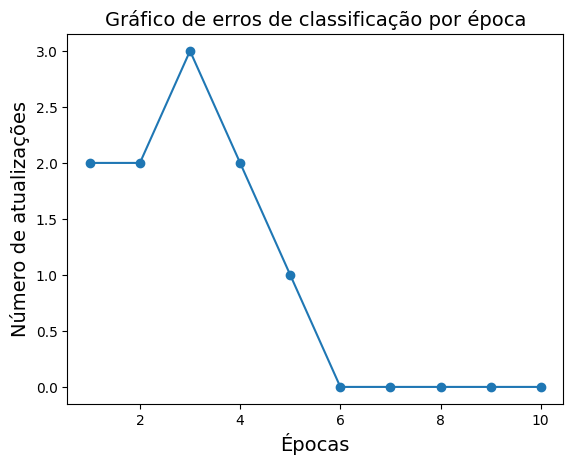

In [61]:
# Inicializa o modelo Perceptron com taxa de aprendizado (eta) de 0.1 e 10 iterações (épocas)
ppn = Perceptron(eta=0.1, n_iter=10)

# Treina o modelo utilizando os dados de entrada X e os rótulos y
ppn.fit(X, y)

# Plota a quantidade de atualizações (erros) em cada época para verificar a convergência
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de atualizações')
plt.title('Gráfico de erros de classificação por época')

# Exibe o gráfico resultante
plt.show()

Como podemos ver no gráfico acima, nosso perceptron convergiu após a sexta época e agora deve ser capaz de classificar os exemplos de treinamento perfeitamente.

Vamos implementar uma pequena função de conveniência para visualizar as fronteiras de decisão para conjuntos de dados bidimensionais:

In [62]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Plota as regiões de decisão de um classificador para visualização de dados 2D.

    Parâmetros:
    -----------
    X : array-like, shape = [n_exemplos, 2]
        Matriz de características de treinamento.
    y : array-like, shape = [n_exemplos]
        Vetor de rótulos das classes.
    classifier : objeto
        O modelo de classificação treinado que possui o método `predict`.
    resolution : float, opcional (padrão: 0.02)
        Resolução da grade utilizada para desenhar a superfície de decisão.
    """

    # configura o gerador de marcadores e o mapa de cores
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plota a superfície de decisão
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plota os exemplos das classes
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Classe {cl}', 
                    edgecolor='black')

Primeiro, definimos uma série de cores e marcadores e criamos um mapa de cores a partir da lista de cores via `ListedColormap`.

Em seguida, determinamos os valores mínimo e máximo para as duas características e usamos esses vetores de características para criar um par de matrizes de grade, `xx1` e `xx2`, por meio da função `meshgrid` do NumPy.

Como treinamos nosso classificador perceptron em duas dimensões de características, precisamos achatar as matrizes de grade e criar uma matriz que tenha o mesmo número de colunas que o subconjunto de treinamento Iris, para que possamos usar o método predict para prever os rótulos de classe, lab, dos pontos de grade correspondentes.

Depois de remodelar os rótulos de classe previstos, lab, em uma grade com as mesmas dimensões de `xx1` e `xx2`, podemos agora desenhar um gráfico de contorno por meio da função `contourf` do Matplotlib, que mapeia as diferentes regiões de decisão para cores diferentes para cada classe prevista na matriz de grade:

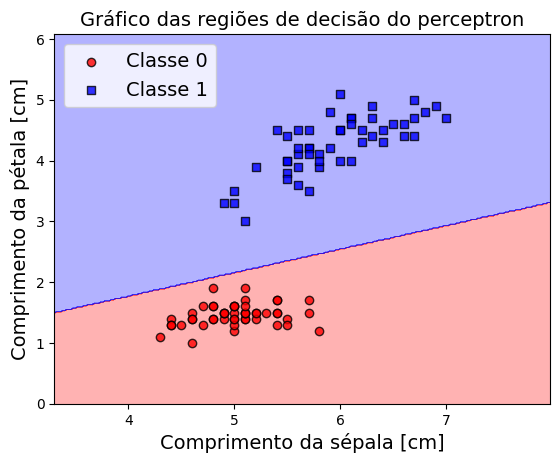

In [63]:
# Plota as regiões de decisão para o classificador
plot_decision_regions(X, y, classifier=ppn)

# Define os rótulos dos eixos X e Y
plt.xlabel('Comprimento da sépala [cm]')
plt.ylabel('Comprimento da pétala [cm]')

# Adiciona a legenda no canto superior esquerdo
plt.legend(loc='upper left')
plt.title('Gráfico das regiões de decisão do perceptron')

# Exibe o gráfico final
plt.show()

Como podemos ver no gráfico, o perceptron aprendeu uma fronteira de decisão que pode classificar perfeitamente todos os exemplos de flores no subconjunto de treinamento Iris.

---
> 
> Convergência do Perceptron
> 
> Embora o perceptron tenha classificado as duas classes de flores Iris perfeitamente, a convergência é um dos maiores problemas do perceptron.
> 
> Rosenblatt provou matematicamente que a regra de aprendizado do perceptron converge se as duas classes puderem ser separadas por um hiperplano linear.
> 
> No entanto, se as classes não puderem ser separadas perfeitamente por tal fronteira de decisão linear, os pesos nunca pararão de ser atualizados, a menos que definamos um número máximo de épocas.
> 
> Se você estiver interessado pode encontrar um resumo da prova nesses slides de aula em https://sebastianraschka.com/pdf/lecture-notes/stat453ss21/L03_perceptron_slides.pdf.
> 
---

### Neurônios lineares adaptativos e a convergência do aprendizado

Nesta seção, daremos uma olhada em outro tipo de **rede neural (NN) de camada única: ADAptive LInear NEuron (Adaline)**.

O Adaline foi publicado por Bernard Widrow e seu aluno de doutorado Tedd Hoff apenas alguns anos após o algoritmo perceptron de Rosenblatt, e pode ser considerado uma melhoria em relação a este último (*An Adaptive “Adaline” Neuron Using Chemical “Memistors”, Technical Report Number 1553-2 by B. Widrow and colleagues, Stanford Electron Labs, Stanford, CA, October* 1960).

O algoritmo Adaline é particularmente interessante porque ilustra os conceitos-chave de definição e minimização de funções de custo contínuas (*continuous loss functions*). Isso estabelece as bases para o entendimento de outros algoritmos de aprendizado de máquina para classificação, como regressão logística, máquinas de vetores de suporte(*support vector machines*-SVMs) e redes neurais multicamadas, bem como modelos de regressão linear.

A principal diferença entre a regra Adaline (também conhecida como regra de **Widrow-Hoff**) e o perceptron de Rosenblatt é que os pesos são atualizados com base em uma função de ativação linear, em vez de uma função de degrau unitário como no perceptron. No Adaline, essa função de ativação linear, $\sigma(z)$, é simplesmente a função identidade da entrada líquida, de modo que $\sigma(z) = z$.

Embora a função de ativação linear seja usada para o aprendizado dos pesos, ainda utilizamos uma função de limiar para fazer a previsão final, o que é semelhante à função de degrau unitário que abordamos anteriormente.

As principais diferenças entre o perceptron e o algoritmo Adaline são destacadas na [Figura 9.5.3](#figure-9-5-3):

![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-5-3.png)

**Figura 9-5-3. Uma comparação entre um perceptron e o algoritmo Adaline** ([Fonte](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html))




Como a [Figura 9.5.3](#figure-9-5-3) indica,
- o algoritmo Adaline compara os rótulos de classe verdadeiros com a saída de valor contínuo da função de ativação linear para calcular o erro do modelo e atualizar os pesos.
- Em contraste, o perceptron compara os rótulos de classe verdadeiros com os rótulos de classe previstos.

#### Minimizando funções de perda com gradiente descendente

Um dos principais ingredientes dos algoritmos de aprendizado de máquina supervisionado é uma função objetivo definida que deve ser otimizada durante o processo de aprendizado. Essa função objetivo é frequentemente uma função de perda ou de custo que queremos minimizar. No caso do Adaline, podemos definir a função de perda, $L$, para aprender os parâmetros do modelo como o erro quadrático médio (MSE - *Mean Squared Error*) entre o resultado calculado e o rótulo da classe verdadeira:

$$
L(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \sigma(z^{(i)}))^2
$$

A principal vantagem desta função de ativação linear contínua, em contraste com a função de degrau unitário, é que a função de perda se torna diferenciável. Outra propriedade desta função de perda é que ela é convexa; assim, podemos usar um algoritmo de otimização muito simples, porém poderoso, chamado *gradiente descendente* para encontrar os pesos que minimizam nossa função de perda para classificar os exemplos no conjunto de dados Iris.

Como ilustrado na [Figura 9.5.4](#figure-9-5-4), podemos descrever a ideia principal por trás do gradiente descendente como descer uma colina até que um mínimo de perda local ou global seja alcançado. Em cada iteração, damos um passo na direção oposta do gradiente, onde o tamanho do passo é determinado pelo valor da taxa de aprendizado, bem como pela inclinação do gradiente (por simplicidade, a figura a seguir visualiza isso apenas para um único peso, $w$):

![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-5-4.png)

**Figura 9-5-4. Como o gradiente descendente funciona** ([Fonte](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html))





Usando o gradiente descendente, podemos agora atualizar os parâmetros do modelo dando um passo na direção oposta do gradiente, $\nabla L(\mathbf{w}, b)$, da nossa função de perda, $L(\mathbf{w}, b)$:

$$
\mathbf{w} := \mathbf{w} + \Delta\mathbf{w}
$$
$$
b := b + \Delta b
$$

As mudanças nos parâmetros, $\Delta\mathbf{w}$ e $\Delta b$, são definidas como o gradiente negativo multiplicado pela taxa de aprendizado, $\eta$:

$$
\Delta\mathbf{w} = -\eta \nabla_{\mathbf{w}} L(\mathbf{w}, b)
$$
$$
\Delta b = -\eta \frac{\partial L}{\partial b}
$$

Para calcular o gradiente da função de perda, precisamos calcular a derivada parcial da função de perda em relação a cada peso, $w_j$:

$$
\frac{\partial L}{\partial w_j} = -\frac{2}{n} \sum_{i} (y^{(i)} - \sigma(z^{(i)})) x_j^{(i)}
$$

Da mesma forma, calculamos a derivada parcial da perda em relação ao viés como:

$$
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i} (y^{(i)} - \sigma(z^{(i)}))
$$

Observe que o 2 no numerador acima é apenas um fator de escala constante, e poderíamos omiti-lo sem afetar o algoritmo. Remover o fator de escala tem o mesmo efeito que alterar a taxa de aprendizado por um fator de 2. A caixa de informações a seguir explica de onde esse fator de escala se origina.

Então, podemos escrever a atualização do peso como:

$$
\Delta w_j = -\eta \frac{\partial L}{\partial w_j} \quad \text{e} \quad \Delta b = -\eta \frac{\partial L}{\partial b}
$$

Como atualizamos todos os parâmetros simultaneamente, nossa regra de aprendizado Adaline torna-se:

$$
\mathbf{w} := \mathbf{w} + \Delta\mathbf{w}, \quad b := b + \Delta b
$$

---

> **A derivada do erro quadrático médio**
> 
> Se você está familiarizado com cálculo, a derivada parcial da função de perda MSE em relação ao $j$-ésimo peso pode ser obtida da seguinte forma:
> 
> $$
\begin{align*}
\frac{\partial L}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{n} \sum_i (y^{(i)} - \sigma(z^{(i)}))^2 = \frac{1}{n} \sum_i \frac{\partial}{\partial w_j} (y^{(i)} - \sigma(z^{(i)}))^2 \\
&= \frac{2}{n} \sum_i (y^{(i)} - \sigma(z^{(i)})) \frac{\partial}{\partial w_j} (y^{(i)} - \sigma(z^{(i)})) \\
&= \frac{2}{n} \sum_i (y^{(i)} - \sigma(z^{(i)})) \frac{\partial}{\partial w_j} \left(y^{(i)} - \sum_j (w_j x_j^{(i)} + b)\right) \\
&= \frac{2}{n} \sum_i (y^{(i)} - \sigma(z^{(i)})) (-x_j^{(i)}) = -\frac{2}{n} \sum_i (y^{(i)} - \sigma(z^{(i)})) x_j^{(i)}
\end{align*}
$$
> 
> A mesma abordagem pode ser usada para encontrar a derivada parcial $\frac{\partial L}{\partial b}$, exceto que $\frac{\partial}{\partial b}(y^{(i)} - \sum_i (w_j x_j^{(i)} + b))$ é igual a -1 e, portanto, o último passo simplifica para $-\frac{2}{n} \sum_i (y^{(i)} - \sigma(z^{(i)}))$.
> 
---

Embora a regra de aprendizado do Adaline pareça idêntica à regra do perceptron, devemos notar que $\sigma(z^{(i)})$ com $z^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)} + b$ é um número real e não um rótulo de classe inteiro. Além disso, a atualização do peso é calculada com base em todos os exemplos no conjunto de dados de treinamento (em vez de atualizar os parâmetros incrementalmente após cada exemplo de treinamento), e é por isso que essa abordagem também é referida como *gradiente descendente em lote* (*batch gradient descent*). Para ser mais explícito e evitar confusão ao falar sobre conceitos relacionados mais tarde nesta aula  e neste curso, nos referiremos a esse processo como *gradiente descendente em lote completo* (*full batch gradient descent*).

#### Implementando o Adaline em Python

Como a regra do perceptron e o Adaline são muito semelhantes, pegaremos a implementação do perceptron que definimos anteriormente e alteraremos o método fit para que os parâmetros de peso e viés sejam agora atualizados minimizando a função de perda via gradiente descendente:

In [64]:
class AdalineGD:
    """Classificador ADAptive LInear NEuron (Adaline).

    Parâmetros
    ------------
    eta : float
      Taxa de aprendizado (entre 0.0 e 1.0)
    n_iter : int
      Número de passagens sobre o conjunto de dados de treinamento (épocas).
    random_state : int
      Semente do gerador de números aleatórios para inicialização dos pesos.


    Atributos
    -----------
    w_ : 1d-array
      Pesos após o ajuste.
    b_ : Escalar
      Unidade de viés (bias) após o ajuste.
    losses_ : lista
      Valores da função de perda de erro quadrático médio em cada época.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Ajusta aos dados de treinamento.

        Parâmetros
        ----------
        X : {semelhante a um array}, formato = [n_exemplos, n_recursos]
          Vetores de treinamento, onde n_exemplos é o número de exemplos e
          n_recursos é o número de recursos (features).
        y : semelhante a um array, formato = [n_exemplos]
          Valores de alvo (labels).

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Observe que o método "activation" não tem efeito no código, 
            # pois é simplesmente uma função de identidade. Poderíamos escrever 
            # output = self.net_input(X) diretamente. O propósito da ativação 
            # é mais conceitual, por exemplo, no caso da regressão logística, 
            # poderíamos alterá-la para uma função sigmoide para implementar 
            # um classificador de regressão logística.
            output = self.activation(net_input)
            errors = (y - output)
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calcula a entrada líquida"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Calcula a ativação linear"""
        return X

    def predict(self, X):
        """Retorna o rótulo da classe após o degrau unitário"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


Em vez de atualizar os pesos após avaliar cada exemplo de treinamento individual, como no perceptron, calculamos o gradiente com base em todo o conjunto de dados de treinamento. Para a unidade de viés, isso é feito via `self.eta * 2.0 * errors.mean()`, onde `errors` é um array contendo os valores da derivada parcial $\partial L/\partial b$.

Da mesma forma, atualizamos os pesos. No entanto, note que as atualizações dos pesos através das derivadas parciais $\partial L/\partial w_j$ envolvem os valores das características $x_j$, que podemos calcular multiplicando os erros por cada valor de característica para cada peso:

```python
for w_j in range(self.w_.shape[0]):
    self.w_[w_j] += self.eta *
        (2.0 * (X[:, w_j]*errors)).mean()
```

Para implementar a atualização dos pesos de forma mais eficiente sem usar um loop for, podemos usar uma multiplicação matriz-vetor entre nossa matriz de características e o vetor de erro:
```python
self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
```

Observe que o método de ativação não tem efeito no código, pois é simplesmente uma função identidade. Aqui, adicionamos a função de ativação (calculada através do método `activation`) para ilustrar o conceito geral de como a informação flui através de uma rede neural de camada única: características dos dados de entrada, entrada líquida, ativação e saída.

Na próxima aula, aprenderemos sobre um classificador de regressão logística que utiliza uma função de ativação não linear e não identitária. Veremos que um modelo de regressão logística está intimamente relacionado ao Adaline, com a única diferença sendo sua função de ativação e função de perda.

Agora, de forma semelhante à implementação anterior do perceptron, coletamos os valores de perda em uma lista `self.losses_list` para verificar se o algoritmo convergiu após o treinamento.

Na prática, muitas vezes é necessário realizar alguns experimentos para encontrar uma boa taxa de aprendizado, $\eta$, para a convergência ideal. Portanto, vamos escolher duas taxas de aprendizado diferentes, $\eta=0,1$ e $\eta=0,001$, para começar e plotar as funções de perda em relação ao número de épocas para ver o quão bem a implementação do Adaline aprende a partir dos dados de treinamento.

---

> Hiperparâmetros
> 
> A taxa de aprendizado, $\eta$ (eta), bem como o número de épocas (`n_iter`), são os chamados hiperparâmetros (*tunning parameters*) dos algoritmos de aprendizado perceptron e Adaline.

---

Vamos agora plotar a perda em relação ao número de épocas para as duas diferentes taxas de aprendizado:

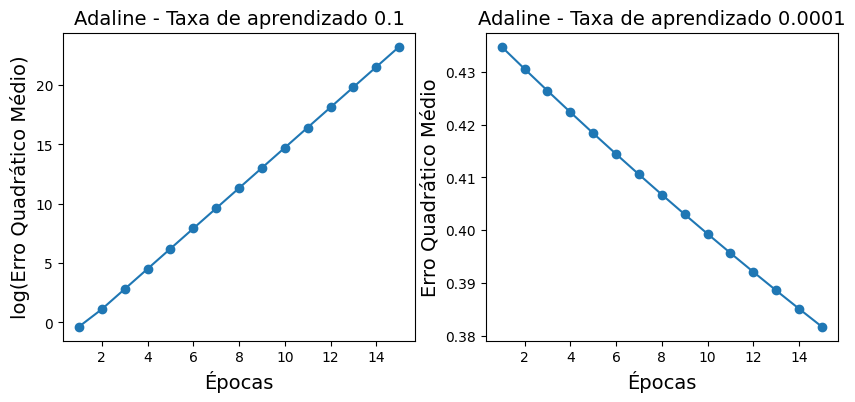

In [65]:
# Cria uma figura com 1 linha e 2 colunas para os subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Treina o modelo Adaline com taxa de aprendizado (eta) de 0.1
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
# Plota o logaritmo do erro quadrático médio por época
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('log(Erro Quadrático Médio)')
ax[0].set_title('Adaline - Taxa de aprendizado 0.1')

# Treina o modelo Adaline com taxa de aprendizado (eta) de 0.0001
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
# Plota o erro quadrático médio por época
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Erro Quadrático Médio')
ax[1].set_title('Adaline - Taxa de aprendizado 0.0001')

# Exibe os gráficos gerados
plt.show()


# GRÁFICOS DE ERRO PARA TAXAS DE APRENDIZAGEM SUBÓTIMAS

Como podemos ver nos gráficos da função de perda resultantes, encontramos dois tipos diferentes de problemas. O gráfico à esquerda mostra o que poderia acontecer se escolhermos uma taxa de aprendizado muito grande. Em vez de minimizar a função de perda, o MSE torna-se maior a cada época, porque *ultrapassamos* (overshoot) o mínimo global.
Por outro lado, podemos ver que a perda diminui no gráfico à direita, mas a taxa de aprendizado escolhida, $\eta=0,0001$, é tão pequena que o algoritmo exigiria um número muito grande de épocas para convergir.

A [Figura 9-5-5](#figure-9-5-5) ilustra o que pode acontecer se alterarmos o valor de um parâmetro de peso específico para minimizar a função de perda, $L$.
- A subfigura à esquerda ilustra o caso de uma taxa de aprendizado bem escolhida, onde a perda diminui gradualmente, movendo-se na direção do mínimo global.
- A subfigura à direita, no entanto, ilustra o que acontece se escolhermos uma taxa de aprendizado muito grande — ultrapassamos o mínimo global:

![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-5-5.png)

**Figura 9-5-5. Uma comparação entre uma taxa de aprendizado bem escolhida e uma taxa de aprendizado excessivamente alta** ([Fonte](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html))

#### Melhorando o gradiente descendente através do escalonamento de atributos

Muitos algoritmos de aprendizado de máquina precisam de dados numéricos e normalizados para funcionar corretamente. Por isso, é comum que os dados sejam transformados em valores entre 0 e 1.

O gradiente descendente é um dos muitos algoritmos que se beneficiam do escalonamento de características. Nesta seção, usaremos um método de escalonamento de características chamado **padronização**. Este procedimento de normalização ajuda o aprendizado do gradiente descendente a convergir mais rapidamente; no entanto, não torna o conjunto de dados original normalmente distribuído.

A padronização desloca a média de cada característica para que ela seja centrada em zero e cada característica tenha um desvio padrão de 1 (variância unitária).

Por exemplo, para padronizar a j-ésima característica, podemos simplesmente subtrair a média da amostra, $\mu_j$, de cada exemplo de treinamento e dividi-la pelo seu desvio padrão, $\sigma_j$:

$$\mathbf{x}_j^{(i)} \leftarrow \frac{\mathbf{x}_j^{(i)} - \mu_j}{\sigma_j}$$

Aqui, $\mathbf{x}_j^{(i)}$ é um vetor que consiste nos valores da $j$-ésima característica de todos os exemplos de treinamento, $n$, e essa técnica de padronização é aplicada a cada característica, $j$, em nosso conjunto de dados.

Uma das razões pelas quais a padronização ajuda no aprendizado por gradiente descendente é que é mais fácil encontrar uma taxa de aprendizado que funcione bem para todos os pesos (e para o bias).

Se as características estiverem em escalas muito diferentes, uma taxa de aprendizado que funcione bem para atualizar um peso pode ser muito grande ou muito pequena para atualizar o outro peso igualmente bem.

No geral, o uso de características padronizadas pode estabilizar o treinamento de forma que o otimizador precise de menos etapas para encontrar uma solução boa ou ideal (o mínimo global da função de perda).

A [Figura 9-5-6](#figure-9-5-6) ilustra possíveis atualizações de gradiente com características não escalonadas (esquerda) e características padronizadas (direita), onde os círculos concêntricos representam a superfície de perda em função de dois pesos do modelo em um problema de classificação bidimensional:

![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-5-6.png)


**Figura 9-5-6. Uma comparação de atributos não escalonados e padronizados nas atualizações de gradiente** ([Fonte](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html))

A padronização pode ser facilmente alcançada usando os métodos integrados do NumPy `mean` e `std`:

In [66]:
# Padronizar as características (Standardization)
X_std = np.copy(X)
# Aplica a fórmula (x - média) / desvio padrão para a primeira coluna
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
# Aplica a fórmula (x - média) / desvio padrão para a segunda coluna
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

Após a padronização, treinaremos o Adaline novamente e veremos que agora ele converge após um pequeno número de épocas usando uma taxa de aprendizado de $\eta=0,5$:

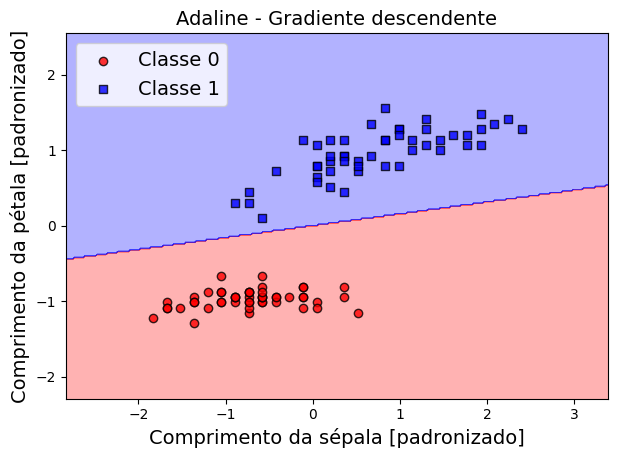

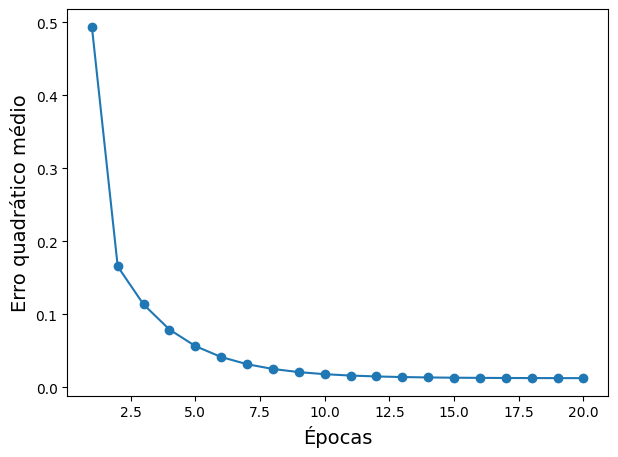

In [67]:
# Inicializa e treina o classificador Adaline com Descida de Gradiente
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

# Plota as regiões de decisão do modelo treinado
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradiente descendente')
plt.xlabel('Comprimento da sépala [padronizado]')
plt.ylabel('Comprimento da pétala [padronizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

# Plota o gráfico de convergência do erro quadrático médio por época
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Erro quadrático médio')

plt.tight_layout()
#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()


## GRÁFICOS DAS REGIÕES DE DECISÃO DO ADALINE E MSE POR NÚMERO DE ÉPOCAS`

Como podemos ver nos gráficos, o Adaline agora convergiu após o treinamento com as características padronizadas. No entanto, observe que o MSE permanece diferente de zero, embora todos os exemplos de flores tenham sido classificados corretamente.

#### Aprendizado de máquina em larga escala e gradiente descendente estocástico

Na seção anterior, aprendemos como minimizar uma função de perda dando um passo na direção oposta ao gradiente da perda calculado a partir de todo o conjunto de dados de treinamento; por isso, essa abordagem às vezes também é referida como gradiente descendente em lote (*full batch gradient descent*).

Agora, imagine que temos um conjunto de dados muito grande, com milhões de pontos de dados, o que não é incomum em muitas aplicações de aprendizado de máquina.
- Executar o gradiente descendente em lote pode ser computacionalmente muito caro nesses cenários, pois precisamos reavaliar todo o conjunto de dados de treinamento cada vez que damos um passo em direção ao mínimo global.

Uma alternativa popular ao algoritmo de gradiente descendente em lote é o **_gradiente descendente estocástico_** (SGD), que às vezes também é chamado de gradiente descendente iterativo ou online.
- Em vez de atualizar os pesos com base na soma dos erros acumulados em todos os exemplos de treinamento, $x^(i)$:

$$
\Delta \mathbf{w} = \frac{2\eta}{\eta} \sum_{i} (y^{(i)} - \sigma(z^{(i)})) \mathbf{{x}^{(i)}_{j}}
$$

- nós atualizamos os parâmetros incrementalmente para cada exemplo de treinamento, por exemplo:

$$
\Delta \mathbf{w} = \eta (y^{(i)} - \sigma(z^{(i)})) {{x}^{(i)}_{j}}
$$
$$
\Delta b = \eta (y^{(i)} - \sigma(z^{(i)}))
$$

Embora o SGD possa ser considerado como uma aproximação do gradiente descendente, ele tipicamente atinge a convergência muito mais rápido por causa das atualizações de peso mais frequentes.

Como cada gradiente é calculado com base em um único exemplo de treinamento, a superfície de erro é mais ruidosa do que no gradiente descendente, o que também pode ter a vantagem de que o SGD pode escapar de mínimos locais rasos mais facilmente se estivermos trabalhando com funções de perda não lineares.

Para obter resultados satisfatórios via SGD, é importante apresentar os dados de treinamento em uma ordem aleatória; além disso, queremos embaralhar o conjunto de dados de treinamento a cada época para evitar ciclos.


> **Ajustando a taxa de aprendizado durante o treinamento**
>
> Em implementações de SGD, a taxa de aprendizado fixa, $\eta$, é frequentemente substituída por uma taxa de aprendizado adaptativa que diminui ao longo do tempo, por exemplo:
>
> $$ \frac{c_1}{[\text{número de iterações}] + c_2} $$
>
> onde $c_1$ e $c_2$ são constantes. Note que o SGD não atinge o mínimo global da perda, mas uma área muito próxima a ele. E usando uma taxa de aprendizado adaptativa, podemos alcançar um *annealing* (resfriamento/recozimento) adicional para o mínimo da perda.

Outra vantagem do SGD é que podemos usá-lo para o **aprendizado online** (*online learning*). No aprendizado online, nosso modelo é treinado em tempo real (*on the fly*) à medida que novos dados de treinamento chegam. Isso é especialmente útil se estivermos acumulando grandes quantidades de dados, por exemplo, dados de clientes em aplicações web. Usando o aprendizado online, o sistema pode se adaptar imediatamente às mudanças, e os dados de treinamento podem ser descartados após a atualização do modelo se o espaço de armazenamento for um problema.

---

> **Gradiente descendente em minilote (*Mini-batch gradient descent*)**
>
> Um compromisso entre o gradiente descendente em lote completo e o SGD é o chamado **gradiente descendente em minilote**. O gradiente descendente em minilote pode ser entendido como a aplicação do gradiente descendente em lote completo a subconjuntos menores dos dados de treinamento, por exemplo, 32 exemplos de treinamento de cada vez. A vantagem sobre o gradiente descendente em lote completo é que a convergência é alcançada mais rapidamente via minilotes devido às atualizações de peso mais frequentes. Além disso, o aprendizado em minilote nos permite substituir o loop `for` sobre os exemplos de treinamento no SGD por operações vetorizadas aproveitando conceitos de álgebra linear (por exemplo, implementando uma soma ponderada via um produto escalar), o que pode melhorar ainda mais a eficiência computacional do nosso algoritmo de aprendizado.

---

Como já implementamos a regra de aprendizado Adaline usando gradiente descendente, precisamos apenas fazer alguns ajustes para modificar o algoritmo de aprendizado para atualizar os pesos via SGD. Dentro do método `fit`, agora atualizaremos os pesos após cada exemplo de treinamento. Além disso, implementaremos um método `partial_fit` adicional, que não reinicializa os pesos, para o aprendizado online. Para verificar se nosso algoritmo convergiu após o treinamento, calcularemos a perda como a perda média dos exemplos de treinamento em cada época. Além disso, adicionaremos uma opção para embaralhar os dados de treinamento antes de cada época para evitar ciclos repetitivos quando estivermos otimizando a função de perda; através do parâmetro `random_state`, permitimos a especificação de uma semente aleatória para reprodutibilidade:

In [68]:
class AdalineSGD:
    """Classificador de Neurônio Linear Adaptativo (Adaline).

    Parâmetros
    ------------
    eta : float
      Taxa de aprendizado (entre 0.0 e 1.0)
    n_iter : int
      Passagens sobre o conjunto de dados de treinamento (épocas).
    shuffle : bool (padrão: True)
      Se True, embaralha os dados de treinamento a cada época para evitar ciclos.
    random_state : int
      Semente do gerador de números aleatórios para inicialização dos pesos.


    Atributos
    -----------
    w_ : 1d-array
      Pesos após o ajuste.
    b_ : Escalar
        Unidade de viés (bias) após o ajuste.
    losses_ : list
      Valor da função de perda (erro quadrático médio) médio por época.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Ajusta os dados de treinamento.

        Parâmetros
        ----------
        X : {array-like}, formato = [n_exemplos, n_recursos]
          Vetores de treinamento, onde n_exemplos é o número de exemplos e
          n_recursos é o número de recursos (features).
        y : array-like, formato = [n_exemplos]
          Valores alvo (labels).

        Retorna
        -------
        self : objeto

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Ajusta os dados de treinamento sem reinicializar os pesos"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Embaralha os dados de treinamento"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Inicializa os pesos com números aleatórios pequenos"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Aplica a regra de aprendizado do Adaline para atualizar os pesos"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calcula a entrada líquida"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Computa a ativação linear"""
        return X

    def predict(self, X):
        """Retorna o rótulo da classe após o degrau unitário"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


O método _shuffle que estamos usando agora no classificador `AdalineSGD` funciona da seguinte forma: através da função permutation em np.random, geramos uma sequência aleatória de números únicos no intervalo de 0 a 100. Esses números podem então ser usados como índices para embaralhar nossa matriz de características e o vetor de rótulos de classe.

Podemos então usar o método fit para treinar o classificador AdalineSGD e usar nosso `plot_decision_regions` para plotar nossos resultados de treinamento:

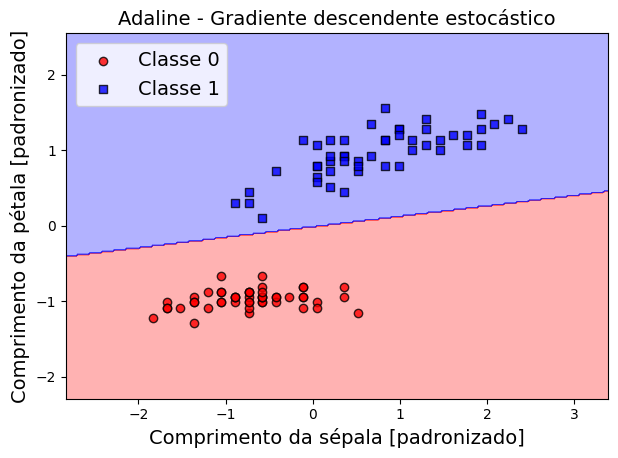

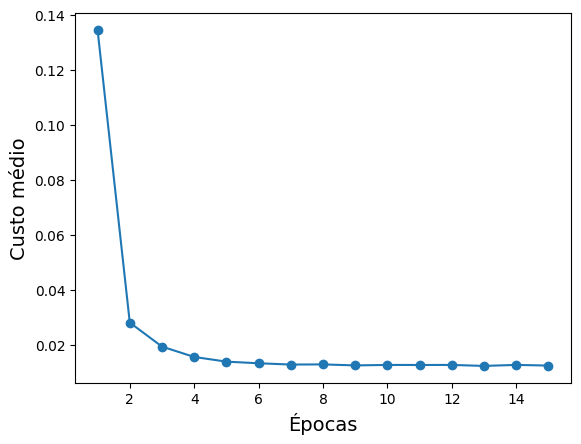

In [69]:
# Inicializa o modelo AdalineSGD com 15 iterações e taxa de aprendizado de 0.01
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
# Treina o modelo usando os dados padronizados
ada_sgd.fit(X_std, y)

# Plota as regiões de decisão do classificador
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Gradiente descendente estocástico')
plt.xlabel('Comprimento da sépala [padronizado]')
plt.ylabel('Comprimento da pétala [padronizado]')
plt.legend(loc='upper left')

plt.tight_layout()
# Salva o gráfico das regiões de decisão
plt.savefig('02_15_1.png', dpi=300)
plt.show()

# Plota a evolução do custo médio por época para verificar a convergência
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Custo médio')

# Salva o gráfico da função de custo
plt.savefig('02_15_2.png', dpi=300)
plt.show()

## Regiões de decisão e gráficos de custo médio após treinar um modelo Adaline usando SGD

Como você pode ver, a perda média diminui rapidamente, e a fronteira de decisão final após 15 épocas parece semelhante ao Adaline com gradiente descendente em lote. Se quisermos atualizar nosso modelo, por exemplo, em um cenário de aprendizado online com dados em fluxo, poderíamos simplesmente chamar o método partial_fit em exemplos de treinamento individuais — por exemplo, `ada_sgd.partial_fit(X_std[0, :], y[0])`.

### Treinando um modelo perceptron no conjunto de dados Iris com **Scikit-Learn**


O Scikit-Learn fornece uma classe `Perceptron` que pode ser usada praticamente como você esperaria — por exemplo, no conjunto de dados *iris* ([4 – Treinando modelos](./04_training_linear_models.ipynb) ):

In [70]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # prevê True e False para essas 2 flores

In [71]:
y_pred

array([ True, False])

Você pode ter notado que o algoritmo de aprendizado do Perceptron se assemelha fortemente ao gradiente descendente estocástico ([4 – Treinando modelos](./04_training_linear_models.ipynb) ). De fato, a classe `Perceptron` do Scikit-Learn é equivalente a usar um `SGDClassifier` com os seguintes hiperparâmetros: `loss="perceptron"`, `learning_rate="constant"`, `eta0=1` (a taxa de aprendizado) e `penalty=None` (sem regularização).

> Ao contrário dos classificadores de regressão logística, os Perceptrons não geram uma probabilidade de classe. Essa é uma razão para preferir a regressão logística aos Perceptrons. Além disso, os Perceptrons não usam nenhuma regularização por padrão, e o treinamento para assim que não há mais erros de previsão no conjunto de treinamento, de modo que o modelo normalmente não generaliza tão bem quanto a regressão logística ou um classificador SVM linear. No entanto, os Perceptrons podem treinar um pouco mais rápido.

Em sua monografia de 1969, *Perceptrons*, Marvin Minsky e Seymour Papert destacaram várias fraquezas sérias dos Perceptrons — em particular, o fato de que eles são incapazes de resolver alguns problemas triviais (por exemplo, o problema de classificação *Ou Exclusivo* (XOR); veja o lado esquerdo da Figura 9-6). Isso é verdade para qualquer outro modelo de classificação linear (como classificadores de regressão logística), mas os pesquisadores esperavam muito mais dos Perceptrons, e alguns ficaram tão decepcionados que abandonaram completamente as redes neurais em favor de abordagens mais formais, como lógica, resolução de problemas e busca. A falta de aplicações práticas também não ajudou.

Acontece que algumas das limitações dos Perceptrons podem ser eliminadas empilhando múltiplos Perceptrons. A ANN resultante é chamada de *Perceptron Multicamadas* (MLP - *Multi-Layer Perceptron*).

> Antes de ir para o perceptron multicamadas, vamos ver como construir e treinar um Perceptron simples usando o Scikit-Learn.

O `Perceptron` é equivalente a um `SGDClassifier` com `loss=“perceptron”`, sem regularização e uma taxa de aprendizagem constante igual a 1:

In [72]:
# Construir e treinar um Perceptron com sklearn

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

Quando o Perceptron encontra um limite de decisão que separa adequadamente as classes, ele interrompe o aprendizado. Isso significa que o limite de decisão geralmente fica bem próximo a uma classe:

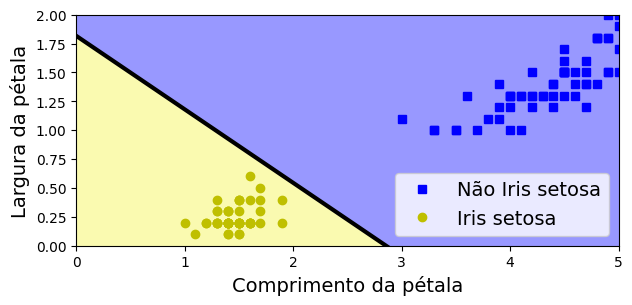

In [73]:
# plota o limite de decisão de um Perceptron no conjunto de dados iris

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Não Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Comprimento da pétala")
plt.ylabel("Largura da pétala")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

### O Perceptron Multicamadas e o Backpropagation

Acontece que algumas das limitações dos Perceptrons podem ser eliminadas empilhando múltiplos Perceptrons. A ANN resultante é chamada de *Perceptron Multicamadas* (MLP - *Multi-Layer Perceptron*). Um MLP pode resolver o problema do XOR, como você pode verificar calculando a saída do MLP representado no lado direito da [Figura 9-6](#figure-9-6): com entradas (0, 0) ou (1, 1), a rede gera 0, e com entradas (0, 1) ou (1, 0) ela gera 1. Tente verificar se essa rede realmente resolve o problema do XOR!

<a id="figure-9-6"></a>


![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-6.png)

**Figura 9-6. O problema da classificação XOR e uma MLP que resolve isso.**([Fonte](https://ageron.github.io/))

Por exemplo, quando as entradas são (0, 1), o neurônio inferior esquerdo calcula 0 × 1 + 1 × 1 – 3 / 2 = –1 / 2, que é negativo, portanto, ele gera 0. O neurônio inferior direito calcula 0 × 1 + 1 × 1 – 1 / 2 = 1 / 2, que é positivo, então ele produz 1. O neurônio de saída recebe as saídas dos dois primeiros neurônios como suas entradas, então ele calcula 0 × (–1) + 1 × 1 - 1 / 2 = 1 / 2. Isso é positivo, então ele produz 1.

Um MLP é composto por uma camada de entrada (*input layer*), uma ou mais camadas de TLUs chamadas *camadas ocultas* (*hidden layers*) e uma camada final de TLUs chamada *camada de saída* (*output layer*) (ver [Figura 9-7](#figure-9-7)). As camadas próximas à camada de entrada são geralmente chamadas de *camadas inferiores*, e as próximas às saídas são geralmente chamadas de *camadas superiores*.

<a id="figure-9-7"></a>


![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-7.png)

**Figura 9-7. Arquitetura de um preceptron multicamadas com duas entradas, uma camada oculta de quatro neurônios, e três neurônios de saída.**([Fonte](https://ageron.github.io/))

 > O sinal flui apenas em uma direção (das entradas para as saídas), portanto, essa arquitetura é um exemplo de *rede neural feedforward* (FNN - *feedforward neural network*).

Quando uma ANN contém uma pilha profunda de camadas ocultas, ela é chamada de *rede neural profunda* (DNN - *deep neural network*).

O campo do *Deep Learning* (Aprendizado Profundo) estuda as DNNs e, de forma mais geral, está interessado em modelos que contêm pilhas profundas de computações. Mesmo assim, muitas pessoas falam em *Deep Learning* sempre que redes neurais estão envolvidas (mesmo as rasas).

> Na década de 1990, uma ANN com mais de duas camadas ocultas era considerada profunda. Hoje em dia, é comum ver ANNs com dezenas de camadas, ou mesmo centenas, então a definição de “profunda” é bastante vaga.

Por muitos anos, pesquisadores lutaram para encontrar uma maneira de treinar MLPs, sem sucesso. No início da década de 1960, vários pesquisadores discutiram a possibilidade de usar o gradiente descendente para treinar redes neurais, mas, (como vê-se em [4 – Treinando modelos](./04_training_linear_models.ipynb) ) isso requer calcular os gradientes do erro do modelo em relação aos parâmetros do modelo; não estava claro na época como fazer isso de forma eficiente com um modelo tão complexo contendo tantos parâmetros, especialmente com os computadores que eles tinham na época.

Então, em 1970, um pesquisador chamado Seppo Linnainmaa introduziu em sua tese de mestrado uma técnica para calcular todos os gradientes de forma automática e eficiente. Esse algoritmo é agora chamado de *diferenciação automática em modo reverso* (ou *reverse-mode autodiff*, para abreviar). Em apenas duas passagens pela rede (uma para frente, uma para trás), ele é capaz de calcular os gradientes do erro da rede neural em relação a cada parâmetro individual do modelo. Em outras palavras, ele pode descobrir como cada peso de conexão e cada viés deve ser ajustado para reduzir o erro da rede neural. Esses gradientes podem então ser usados para realizar um passo de gradiente descendente. Se você repetir esse processo de calcular os gradientes automaticamente e dar um passo de gradiente descendente, o erro da rede neural cairá gradualmente até atingir um mínimo. Essa combinação de *reverse-mode autodiff* e gradiente descendente é agora chamada de *backpropagation* (ou retropropagação).

Aqui está uma analogia: imagine que você está aprendendo a arremessar uma bola de basquete na cesta. Você arremessa a bola (essa é a passagem para frente ou *forward pass*), e observa que ela foi muito para a direita (esse é o cálculo do erro), então você considera como pode mudar a posição do seu corpo para arremessar a bola um pouco menos para a direita na próxima vez (essa é a passagem para trás ou *backward pass*): você percebe que seu braço precisará girar um pouco no sentido anti-horário, e provavelmente todo o seu tronco também, o que por sua vez significa que seus pés devem girar também (note como estamos descendo pelas "camadas"). Depois de pensar sobre isso, você realmente move seu corpo: esse é o passo do gradiente descendente. Quanto menores os erros, menores os ajustes. Conforme você repete todo o processo muitas vezes, o erro diminui gradualmente e, após algumas horas de prática, você consegue colocar a bola na cesta todas as vezes. Bom trabalho!

> Existem várias técnicas de autodiff, com diferentes prós e contras. O autodiff em modo reverso é adequado quando a função a ser diferenciada tem muitas variáveis (por exemplo, pesos de conexão e vieses) e poucas saídas (por exemplo, uma perda). Se você quiser saber mais sobre autodiff, consulte o [Apêndice A - Autodiff](./Appendix_A_autodiff.ipynb).

A retropropagação pode, na verdade, ser aplicada a todos os tipos de gráficos computacionais, não apenas a redes neurais: na verdade, a tese de mestrado de Linnainmaa não era sobre redes neurais, era mais geral. Levou vários anos até que a retropropagação começasse a ser usada para treinar redes neurais, mas ainda não era algo comum. Então, em 1985, David Rumelhart, Geoffrey Hinton e Ronald Williams publicaram um [artigo](https://apps.dtic.mil/sti/html/tr/ADA164453/) analisando como a retropropagação permite que as redes neurais aprendam representações internas úteis. Seus resultados foram tão impressionantes que a retropropagação rapidamente se popularizou na área. Mais de 40 anos depois, ela ainda é, de longe, a técnica de treinamento mais popular para redes neurais.

Vamos repassar como o *backpropagation* funciona novamente com um pouco mais de detalhes:

*   Ele lida com um minilote (*mini-batch*) por vez e percorre todo o conjunto de treinamento várias vezes. Se cada minilote contém 32 instâncias e cada instância tem 100 características, então o minilote será representado como uma matriz com 32 linhas e 100 colunas. Cada passagem pelo conjunto de treinamento é chamada de *época* (*epoch*).
*   Para cada minilote, o algoritmo calcula a saída de todos os neurônios na primeira camada oculta usando a [Equação 9-2](#equation-9-2). Se a camada tem 50 neurônios, então sua saída é uma matriz com uma linha por amostra no minilote (por exemplo, 32) e 50 colunas (ou seja, uma por neurônio). Essa matriz é então passada para a próxima camada, sua saída é calculada e passada para a próxima camada, e assim por diante até obtermos a saída da última camada, a *camada de saída*. Esta é a *passagem para frente* (*forward pass*): é exatamente como fazer previsões, exceto que todos os resultados intermediários são preservados, pois são necessários para a passagem para trás.
*   Em seguida, o algoritmo mede o erro de saída da rede (ou seja, ele usa uma função de perda que compara a saída desejada com a saída real da rede e retorna alguma medida do erro).
*   Então, ele calcula o quanto cada parâmetro da camada de saída contribuiu para o erro. Isso é feito analiticamente aplicando a *regra da cadeia* (uma das regras mais fundamentais do cálculo), o que torna esse passo rápido e preciso. O resultado é um gradiente por parâmetro.
*   O algoritmo então mede quanto dessas contribuições de erro vieram de cada conexão na camada abaixo, novamente usando a regra da cadeia, trabalhando para trás até atingir a camada de entrada. Como explicado anteriormente, essa passagem reversa mede eficientemente o gradiente do erro em todos os pesos de conexão e vieses na rede, propagando o gradiente do erro para trás através da rede (daí o nome do algoritmo).
*   Finalmente, o algoritmo realiza um passo de gradiente descendente para ajustar todos os pesos de conexão e termos de viés na rede, usando os gradientes de erro que acabou de calcular.

> É importante inicializar todos os pesos de conexão das camadas ocultas aleatoriamente, ou então o treinamento falhará. Por exemplo, se você inicializar todos os pesos e vieses com zero, então todos os neurônios em uma determinada camada serão perfeitamente idênticos e, portanto, o *backpropagation* os afetará exatamente da mesma maneira, de modo que permanecerão idênticos. Em outras palavras, apesar de ter centenas de neurônios por camada, seu modelo agirá como se tivesse apenas um neurônio por camada: ele não será muito inteligente. Se, em vez disso, você inicializar os pesos aleatoriamente, você quebra a simetria e permite que o *backpropagation* treine uma equipe diversificada de neurônios.

Em resumo, o *backpropagation* faz previsões para um minilote (passagem para frente), mede o erro, depois passa por cada camada em reverso para medir a contribuição de erro de cada parâmetro (passagem reversa) e, finalmente, ajusta os pesos de conexão e vieses para reduzir o erro (passo de gradiente descendente).

Para que o *backprop* funcione corretamente, Rumelhart e seus colegas fizeram uma mudança fundamental na arquitetura do MLP: eles substituíram a função de degrau pela função logística, $\sigma(z) = 1 / (1 + \exp(–z))$, também chamada de *função sigmoide*. Isso foi essencial porque a função de degrau contém apenas segmentos planos, então não há gradiente para trabalhar (o gradiente descendente não pode se mover em uma superfície plana), enquanto a função sigmoide tem uma derivada diferente de zero bem definida em todos os lugares, permitindo que o gradiente descendente faça algum progresso a cada passo. De fato, o algoritmo de *backpropagation* funciona bem com muitas outras funções de ativação, não apenas a função sigmoide. Aqui estão duas outras escolhas populares:

*   **A função tangente hiperbólica:** $\tanh(z) = 2\sigma(2z) – 1$
    Assim como a função logística, ela tem formato de S, é contínua e diferenciável, mas seu valor de saída varia de –1 a 1 (em vez de 0 a 1 na função logística). Esse intervalo tende a tornar a saída de cada camada mais ou menos normalizada (ou seja, centrada em torno de 0) no início do treinamento, o que geralmente ajuda a acelerar a convergência.
*   **A função Unidade Linear Retificada (*Rectified Linear Unit*):** $\text{ReLU}(z) = \max(0, z)$
    A função ReLU é contínua, mas infelizmente não é diferenciável em $z = 0$ (a inclinação muda abruptamente, o que pode fazer o gradiente descendente oscilar), e sua derivada é 0 para $z < 0$. Na prática, porém, ela funciona muito bem e tem a vantagem de ser rápida de calcular, por isso se tornou o padrão para a maioria das arquiteturas (exceto para a arquitetura Transformer, como veremos em [Transformers para Processamento de Linguagem Natural e Chatbots](./15_transformers_for_nlp_and_chatbots.ipynb)). Importante ressaltar que o fato de ela não ter um valor máximo de saída ajuda a reduzir alguns problemas durante o gradiente descendente (voltaremos a isso em [Treinando Redes Neurais Profundas](./11_training_deep_neural_networks.ipynb)).

Essas funções de ativação populares e suas derivadas são representadas na Figura 9-8. Mas espere! Por que precisamos de funções de ativação, em primeiro lugar? Bem, se você encadear várias transformações lineares, tudo o que você obterá é uma transformação linear. Por exemplo, se $f(x) = 2x + 3 e g(x) = 5x – 1$, então encadear essas duas funções lineares resulta em outra função linear: $f(g(x)) = 2(5x – 1) + 3 = 10x + 1$. Portanto, se você não tiver alguma não linearidade entre as camadas, mesmo uma pilha profunda de camadas será equivalente a uma única camada, e você não poderá resolver problemas muito complexos com isso. Por outro lado, uma DNN grande o suficiente com ativações não lineares pode, teoricamente, aproximar qualquer função contínua.

Vamos vizualizar essas funções de ativação e suas derivadas:

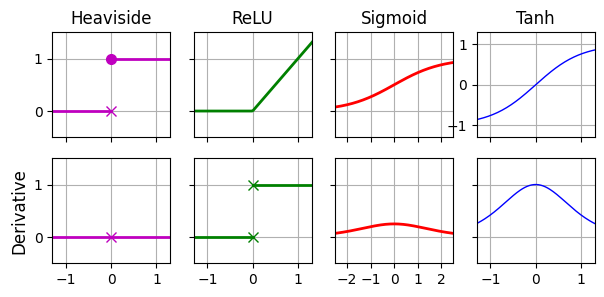

In [74]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

max_z = 2.5
z = np.linspace(-max_z, max_z, 200)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(7, 3))

axes[0, 0].plot([-max_z, 0], [0, 0], "m-", linewidth=2)
axes[0, 0].plot(0, 0, "mx", markersize=7)
axes[0, 0].plot(0, 1, "mo", markersize=7)
axes[0, 0].plot([0, max_z], [1, 1], "m-", linewidth=2)
axes[0, 0].set_title("Heaviside", fontsize=12)
axes[1, 0].plot(z, derivative(np.sign, z), "m-", linewidth=2)
axes[1, 0].plot(0, 0, "mx", markersize=7)
axes[1, 0].set_ylabel("Derivative", fontsize=12)

axes[0, 1].plot(z, relu(z), "g-", linewidth=2)
axes[0, 1].set_title("ReLU", fontsize=12)
axes[1, 1].plot([-max_z, 0], [0, 0], "g-", linewidth=2)
axes[1, 1].plot([0, max_z], [1, 1], "g-", linewidth=2)
axes[1, 1].plot(0, 0, "gx", markersize=7)
axes[1, 1].plot(0, 1, "gx", markersize=7)

axes[0, 2].plot(z, sigmoid(z), "r-", linewidth=2)
axes[0, 2].set_title("Sigmoid", fontsize=12)
axes[1, 2].plot(z, derivative(sigmoid, z), "r-", linewidth=2)

axes[0, 3].plot(z, np.tanh(z), "b-", linewidth=1)
axes[0, 3].set_title("Tanh", fontsize=12)
axes[1, 3].plot(z, derivative(np.tanh, z), "b-", linewidth=1)

for row in range(2):
    for col in range(4):
        axes[row, col].grid(True)
        if row == 0:
            axes[row, col].set_xticklabels([])
        if col == 2:
            axes[row, col].set_xlim(-max_z, max_z)
            axes[row, col].set_xticks([-2, -1, 0, 1, 2])
        else:
            axes[row, col].set_xlim(-1.3, 1.3)
            axes[row, col].set_xticks([-1, 0, 1])
        if col != 0 and ((row, col) != (0, 3)):
            axes[row, col].set_yticklabels([])
        if (row, col) == (0, 3):
            axes[row, col].set_ylim(-1.3, 1.3)
            axes[row, col].set_yticks([-1, 0, 1])
        else:
            axes[row, col].set_ylim(-0.5, 1.5)
            axes[row, col].set_yticks([0, 1])

plt.show()


OK! Você sabe de onde vieram as redes neurais, como é a arquitetura MLP e como ela calcula suas saídas. Você também aprendeu sobre o algoritmo de *backpropagation*. É hora de ver os MLPs em ação!

## Construindo e treinando MLPs com Scikit-Learn

As MLPs podem lidar com uma ampla gama de tarefas, mas as mais comuns são regressão e classificação. O Scikit-Learn pode ajudar em ambas. Vamos começar com a regressão.

#### MLPs de Regressão

Como você construiria um MLP para uma tarefa de regressão? Bem, se você quer prever um único valor (por exemplo, o preço de uma casa, dadas muitas de suas características), então você precisa apenas de um único neurônio de saída: sua saída é o valor previsto. Para regressão multivariada (isto é, para prever múltiplos valores de uma vez), você precisa de um neurônio de saída por dimensão de saída. Por exemplo, para localizar o centro de um objeto em uma imagem, você precisa prever coordenadas 2D, então você precisa de dois neurônios de saída. Se você também quiser colocar uma caixa delimitadora (*bounding box*) ao redor do objeto, então precisará de mais dois números: a largura e a altura do objeto. Assim, você acaba com quatro neurônios de saída.

O Scikit-Learn inclui uma classe `MLPRegressor`, então vamos usá-la para construir um MLP com três camadas ocultas compostas por 50 neurônios cada, e treiná-lo no conjunto de dados de habitação da Califórnia. Para simplificar, usaremos a função `fetch_california_housing()` do Scikit-Learn para carregar os dados. Este conjunto de dados é mais simples do que o que usamos no [02 - Projeto completo de aprendizado de máquina](./02_end_to_end_machine_learning_project.ipynb), pois contém apenas características numéricas (não há a característica `ocean_proximity`), e não há valores ausentes. Os alvos também estão escalados para baixo: cada unidade representa $100.000. Vamos começar importando tudo o que precisaremos:

### MLPs de Regressão

In [75]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Em seguida, vamos buscar o conjunto de dados sobre habitação na Califórnia e dividi-lo em um conjunto de treinamento e um conjunto de teste:

In [76]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

Agora vamos criar um modelo `MLPRegressor` com 3 camadas ocultas compostas por 50 neurônios cada. O tamanho de entrada da primeira camada oculta (isto é, o número de linhas em sua matriz de pesos) e o tamanho de saída da camada de saída (isto é, o número de colunas em sua matriz de pesos) se ajustarão automaticamente à dimensionalidade das entradas e dos alvos, respectivamente, quando o treinamento começar. O modelo usa a função de ativação ReLU em todas as camadas ocultas e nenhuma função de ativação na camada de saída. Também definimos `verbose=True` para obter detalhes sobre o progresso do modelo durante o treinamento,:

In [77]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], early_stopping=True,
                       verbose=True, random_state=42)


Como as redes neurais podem ter muitos parâmetros, elas têm uma tendência a sobreajustar (*overfit*) o conjunto de treinamento. Para reduzir esse risco, uma opção é usar a parada antecipada ou *early stopping* ( veja [04-Treinando Modelos](./04_training_linear_models.ipynb)): quando definimos `early_stopping=True`, a classe `MLPRegressor` reserva automaticamente 10% dos dados de treinamento e os usa para avaliar o modelo a cada época (você pode ajustar o tamanho do conjunto de validação definindo `validation_fraction`). Se a pontuação de validação parar de melhorar por 10 épocas, o treinamento para automaticamente (você pode ajustar esse número de épocas definindo `n_iter_no_change`).

Agora vamos criar um pipeline para padronizar as características de entrada antes de enviá-las para o `MLPRegressor`. Isso é muito importante porque o gradiente descendente não converge muito bem quando as características têm escalas muito diferentes (como vê-se em [04-Treinando Modelos](./04_training_linear_models.ipynb)). Podemos então treinar o modelo! A classe `MLPRegressor` usa uma variante do gradiente descendente chamada Adam (veja [11-Treinando Redes Neurais Profundas](./11_training_deep_neural_networks.ipynb)) para minimizar o erro quadrático médio. Ela também usa um pouco de regularização $\ell_2$ (você pode controlar sua força através do hiperparâmetro `alpha`, que tem o padrão de 0.0001):

In [78]:
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.85190332
Validation score: 0.534299
Iteration 2, loss = 0.28288639
Validation score: 0.651094
Iteration 3, loss = 0.22884372
Validation score: 0.699782
Iteration 4, loss = 0.20746145
Validation score: 0.720468
Iteration 5, loss = 0.19649383
Validation score: 0.724839
Iteration 6, loss = 0.18928708
Validation score: 0.740084
Iteration 7, loss = 0.18132029
Validation score: 0.747406
Iteration 8, loss = 0.17556450
Validation score: 0.753945
Iteration 9, loss = 0.17190651
Validation score: 0.760500
Iteration 10, loss = 0.16687650
Validation score: 0.759213
Iteration 11, loss = 0.16329479
Validation score: 0.761907
Iteration 12, loss = 0.16054473
Validation score: 0.768950
Iteration 13, loss = 0.15690181
Validation score: 0.762699
Iteration 14, loss = 0.15630644
Validation score: 0.766003
Iteration 15, loss = 0.15712517
Validation score: 0.778464
Iteration 16, loss = 0.15155981
Validation score: 0.774237
Iteration 17, loss = 0.14957641
Validation score: 0.778361
Iterat

,steps,"[('standardscaler', ...), ('mlpregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'relu'
,solver,'adam'


E aí está, você acabou de treinar seu primeiro MLP! Foram necessárias 45 épocas e, como você pode ver, a perda de treinamento diminuiu a cada época.


Essa perda corresponde à uma função de custo semelhante à função de custo [Regressão de Ridge](https://en.wikipedia.org/wiki/Ridge_regression) (ver Equação 4.9 em [04-Treinando Modelos](./04_training_linear_models.ipynb)), também chamada de regularização de Tikhonov. Se ela for multiplicada por 2 e desconsiderar um termo de regularização, ela se torna a função de custo MSE padrão para um modelo de regressão linear, conforme mostrado na [Equação 4-4](#equation-4-4), reproduzida abaixo com alterações de notação para se adequar à notação usada neste notebook:

<a id="equation-4-4"></a>
**Equação 4-4(modificada). Função de custo MSE para um modelo de regressão linear**

$$
\text{MSE}(X,W) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$
Nesta equação:
*   $m$ é o número de instâncias de treinamento.
*   $y_i$ é a saída alvo do $j$-ésimo neurônio de saída para a instância de treinamento atual.
*   $\hat{y}_i$ é a saída do $j$-ésimo neurônio de saída para a instância de treinamento atual.
*   $X$ é a matriz de entrada. Ela tem uma linha por instância e uma coluna por característica de entrada.
*   A matriz de pesos $W$ contém todos os pesos das conexões. Ela tem uma linha por característica de entrada e uma coluna por neurônio.


A pontuação de validação geralmente subiu a cada época. Como todo regressor no Scikit-Learn, o `MLPRegressor` usa a pontuação $R^2$ por padrão para avaliação — é isso que o método `score()` retorna. Como vê-se em [02 - Projeto completo de aprendizado de máquina](./02_end_to_end_machine_learning_project.ipynb), a pontuação $R^2$ mede a razão da variância que é explicada pelo modelo. Neste caso, ela chega perto de 80% no conjunto de validação, o que é razoavelmente bom para esta tarefa:

In [79]:
mlp_reg.best_validation_score_

0.791536125425778

Uma métrica mais intuitiva para regressão é o erro quadrático médio (RMSE), conforme mostrado na [Equação-2-1](#equation-2-1) (ver [02 - Projeto completo de aprendizado de máquina](./02_end_to_end_machine_learning_project.ipynb)). 

<a id="equation-2-1"></a>
**Equação 2-1(modificada). Raiz do Erro Quadrático Médio (RMSE)**

$$
\text{RMSE}(X,W) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2}
$$
Nesta equação:
*   $m$ é o número de instâncias de treinamento.
*   $y_i$ é a saída alvo do $j$-ésimo neurônio de saída para a instância de treinamento atual.
*   $\hat{y}_i$ é a saída do $j$-ésimo neurônio de saída para a instância de treinamento atual.
*   $X$ é a matriz de entrada. Ela tem uma linha por instância e uma coluna por característica de entrada.
*   A matriz de pesos $W$ contém todos os pesos das conexões. Ela tem uma linha por característica de entrada e uma coluna por neurônio.

Vamos avaliar o RMSE no conjunto de teste.

In [80]:
y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

In [81]:
rmse

0.5327699946812925

Obtemos um RMSE de teste de cerca de 0,53, o que é comparável ao que você obteria com um classificador de floresta aleatória (*random forest*). Nada mal para uma primeira tentativa! 

A [Figura 9-9](#figure-9-9) é uma plotagem das previsões do modelo versus os alvos (no conjunto de teste). A linha vermelha tracejada representa as previsões ideais (ou seja, iguais aos alvos): a maioria das previsões está próxima dos alvos, mas ainda existem alguns erros, especialmente para alvos maiores.

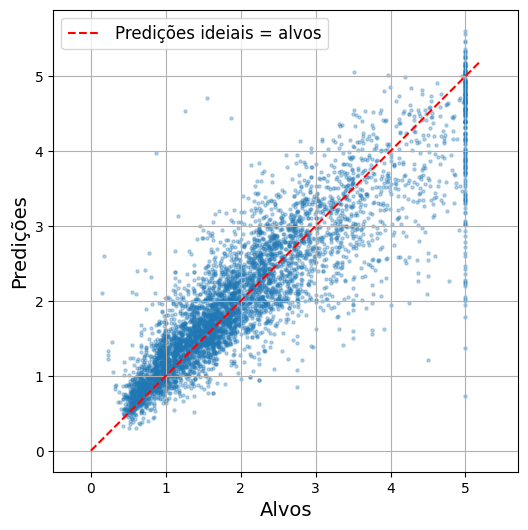

In [82]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, s=5, alpha=0.3)
plt.plot([0, 5.2], [0, 5.2], color='red', linestyle='--',
         label="Predições ideiais = alvos")
plt.axis("equal")
plt.xlabel("Alvos")
plt.ylabel("Predições")
plt.legend(fontsize=12)
plt.grid()

plt.show()

<a id="figure-9-9"></a>
**Figura 9-9. Previsões do regressor MLP versus os alvos**

Note que este MLP não usa nenhuma função de ativação para a camada de saída, então ele é livre para gerar qualquer valor que quiser. Isso geralmente é aceitável, mas se você quiser garantir que a saída seja sempre positiva, então deve usar a função de ativação ReLU na camada de saída, ou a função de ativação *softplus*, que é uma variante suave da ReLU: $\text{softplus}(z) = \log(1 + \exp(z))$. O *softplus* é próximo de 0 quando $z$ é negativo, e próximo de $z$ quando $z$ é positivo. Finalmente, se você quiser garantir que as previsões caiam sempre dentro de um determinado intervalo de valores, então deve usar a função sigmoide ou a tangente hiperbólica, e escalar os alvos para o intervalo apropriado: 0 a 1 para sigmoide e –1 a 1 para tanh. Infelizmente, a classe `MLPRegressor` não suporta funções de ativação na camada de saída.


> O Scikit-Learn não oferece aceleração por GPU, e seus recursos de rede neural são bastante limitados. É por isso que mudaremos para o PyTorch a partir de [Desenvolvendo Redes Neuraisw com Pytorch](./10_neural_nets_with_pytorch.ipynb). Dito isso, é bastante conveniente poder construir e treinar um MLP padrão em apenas algumas linhas de código usando o Scikit-Learn: ele permite que você aborde muitas tarefas complexas muito rapidamente.

Em geral, o erro quadrático médio é a perda certa a ser usada para tarefas de regressão, mas se você tiver muitos *outliers* (valores discrepantes) no conjunto de treinamento, às vezes pode preferir usar o erro médio absoluto, ou preferencialmente a perda de Huber, que é uma combinação de ambos: é quadrática quando o erro é menor que um limiar $\delta$ (tipicamente 1), mas linear quando o erro é maior que $\delta$. A parte linear a torna menos sensível a *outliers* do que o erro quadrático médio, e a parte quadrática permite que ela converja mais rápido e seja mais precisa do que o erro médio absoluto. Infelizmente, o `MLPRegressor` suporta apenas a perda MSE.

A [Tabela 9-1](#table-9-1) resume a arquitetura típica de um MLP de regressão.

<a id="table-9-1"></a>


**Tabela 9-1. Arquitetura típica de MLP de regressão**

| Hiperparâmetro | Valor típico |
| :--- | :--- |
| **# camadas ocultas** | Depende do problema, mas tipicamente 1 a 5 |
| **# neurônios por camada oculta** | Depende do problema, mas tipicamente 10 a 100 |
| **# neurônios de saída** | 1 por dimensão do alvo |
| **Ativação oculta** | ReLU |
| **Ativação de saída** | Nenhuma, ou ReLU/softplus (se saídas positivas) ou sigmoide/tanh (se saídas limitadas) |
| **Função de perda** | MSE, ou Huber se houver *outliers* |

Muito bem, MLPs podem lidar com tarefas de regressão. O que mais eles podem fazer?.
```

### MLPs de Classificação

Os MLPs também podem ser usados para tarefas de classificação. Para um problema de classificação binária, você precisa apenas de um único neurônio de saída usando a função de ativação sigmoide: a saída será um número entre 0 e 1, que você pode interpretar como a probabilidade estimada da classe positiva. A probabilidade estimada da classe negativa é igual a um menos esse número.

Os MLPs também podem lidar facilmente com tarefas de classificação binária multirrótulo (ver  o notebook [03-Classificação](./03_classification.ipynb)). Por exemplo, você poderia ter um sistema de classificação de e-mail que prevê se cada e-mail recebido é *ham* ou *spam*, e simultaneamente prevê se é um e-mail urgente ou não urgente. Neste caso, você precisaria de dois neurônios de saída, ambos usando a função de ativação sigmoide: o primeiro emitiria a probabilidade de que o e-mail seja spam, e o segundo emitiria a probabilidade de que seja urgente. De forma mais geral, você dedicaria um neurônio de saída para cada classe positiva. Note que as probabilidades de saída não somam necessariamente 1. Isso permite que o modelo produza qualquer combinação de rótulos: você pode ter *ham* não urgente, *ham* urgente, *spam* não urgente e talvez até *spam* urgente (embora isso provavelmente fosse um erro).

Se cada instância puder pertencer apenas a uma única classe, de três ou mais classes possíveis (por exemplo, classes de 0 a 9 para classificação de imagens de dígitos), então você precisa ter um neurônio de saída por classe, e deve usar a função de ativação **softmax** para toda a camada de saída (ver [Figura 9-10](#figure-9-10)). A função softmax ( vista em [04-Treinando Modelos](./04_training_linear_models.ipynb)) garantirá que todas as probabilidades estimadas estejam entre 0 e 1, e que somem 1, já que as classes são exclusivas. Como vimos em [03-Classificação](./03_classification.ipynb), isso é chamado de classificação multiclasse.

![](https://github.com/fabiobento/dnn-course-2026-1/raw/main/images/figure-9-10.png)

**Figura 9-10. Um MLP moderno (incluindo ReLU e softmax) para classificação**([Fonte](https://ageron.github.io/))

Lembre-se que a função *softmax* funciona da seguinte forma. Uma vez que você tenha calculado a pontuação de cada classe para a instância $\mathbf{x}$, você pode estimar a probabilidade $\hat{p}_k$ de que a instância pertença à classe $k$ passando as pontuações pela função softmax ([Equação 4-21](#equation-4-2)). A função calcula a exponencial de cada pontuação e, em seguida, normaliza-as (dividindo pela soma de todas as exponenciais). As pontuações são geralmente chamadas de *logits* ou *log-odds* (embora sejam, na verdade, *log-odds* não normalizados).

<a id="equation-4-2"> </a>
**Equação 4-21. Função Softmax**

$$
\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))}
$$

Nesta equação:
*   $K$ é o número de classes.
*   $\mathbf{s}(\mathbf{x})$ é um vetor contendo as pontuações de cada classe para a instância $\mathbf{x}$.
*   $\sigma(\mathbf{s}(\mathbf{x}))_k$ é a probabilidade estimada de que a instância $\mathbf{x}$ pertença à classe $k$, dadas as pontuações de cada classe para essa instância.

Assim como o classificador de regressão logística, por padrão, o classificador de regressão Softmax prevê a classe com a maior probabilidade estimada (que é simplesmente a classe com a maior pontuação), conforme mostrado na [Equação 4-22](#equation-4-22).

<a id="equation-4-22"></a>
**Equação 4-22. Previsão do classificador de regressão Softmax**

$$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma(\mathbf{s}(\mathbf{x}))_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, ((\boldsymbol{\theta}^{(k)})^\top \mathbf{x})
$$

O operador *argmax* retorna o valor de uma variável que maximiza uma função. Nesta equação, ele retorna o valor de $k$ que maximiza a probabilidade estimada $\sigma(\mathbf{s}(\mathbf{x}))_k$.

O classificador de regressão Softmax prevê apenas uma classe por vez (ou seja, é multiclasse, não multissaída), portanto, deve ser usado apenas com classes mutuamente exclusivas, como diferentes espécies de plantas. Você não pode usá-lo para reconhecer várias pessoas em uma única foto.

Em relação à função de perda, como estamos prevendo distribuições de probabilidade, a perda de **entropia cruzada** (ou *cross-entropy*, ou *log loss*, vista em [04-Treinando Modelos](./04_training_linear_models.ipynb)) é geralmente uma boa escolha.

A [Tabela 9-2](#table-9-2) resume a arquitetura típica de um MLP de classificação.

<a id="table-9-2"></a>
**Tabela 9-2. Arquitetura típica de MLP de classificação**

| Hiperparâmetro | Classificação binária | Classificação binária multirrótulo | Classificação multiclasse |
| :--- | :--- | :--- | :--- |
| **# camadas ocultas** | Tipicamente 1 a 5 camadas, dependendo da tarefa | Tipicamente 1 a 5 camadas, dependendo da tarefa | Tipicamente 1 a 5 camadas, dependendo da tarefa |
| **# neurônios de saída** | 1 | 1 por rótulo binário | 1 por classe |
| **Ativação da camada de saída** | Sigmoide | Sigmoide | Softmax |
| **Função de perda** | Entropia cruzada (X-entropy) | Entropia cruzada (X-entropy) | Entropia cruzada (X-entropy) |


Como você poderia esperar, o Scikit-Learn oferece uma classe `MLPClassifier` no pacote `sklearn.neural_network`, que você pode usar para classificação binária ou multiclasse. Ela é quase idêntica à classe `MLPRegressor`, exceto que sua camada de saída usa a função de ativação softmax, e ela minimiza a perda de entropia cruzada em vez do MSE. Além disso, o método `score()` retorna a acurácia do modelo em vez da pontuação $R^2$. Vamos experimentá-la.

Poderíamos abordar o conjunto de dados *iris*, mas essa tarefa é muito simples para uma rede neural: um modelo linear faria o trabalho tão bem quanto e não correria o risco de *overfitting*. Então, vamos abordar uma tarefa mais complexa: o Fashion MNIST. Este é um substituto direto (*drop-in replacement*) para o MNIST (introduzido em [03-Classificação](./03_classification.ipynb)). Ele tem exatamente o mesmo formato que o MNIST (70.000 imagens em escala de cinza de 28 × 28 pixels cada, com 10 classes), mas as imagens representam itens de moda em vez de dígitos manuscritos, então cada classe é muito mais diversa, e o problema acaba sendo significativamente mais desafiador do que o MNIST. Por exemplo, um modelo linear simples atinge cerca de 92% de acurácia no MNIST, mas apenas cerca de 83% no Fashion MNIST. Vamos ver se conseguimos fazer melhor com um MLP.

Primeiro, vamos carregar o conjunto de dados usando a função `fetch_openml()`, muito parecido com o que fizemos para o MNIST em [03-Classificação](./03_classification.ipynb). Observe que os alvos (*targets*) são representados como strings '0', '1', ..., '9', então os convertemos para inteiros:

In [83]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml(name="Fashion-MNIST", as_frame=False)
targets = fashion_mnist.target.astype(int)

Os dados já estão embaralhados, então apenas pegamos as primeiras 60.000 imagens para treinamento e as últimas 10.000 para teste:

In [84]:
X_train, y_train = fashion_mnist.data[:60_000], targets[:60_000]
X_test, y_test = fashion_mnist.data[60_000:], targets[60_000:]


Cada imagem é representada como um array de inteiros 1D contendo 784 intensidades de pixel variando de 0 a 255. Você pode usar a função `plt.imshow()` para plotar uma imagem, mas primeiro você precisa remodelá-la (*reshape*) para:

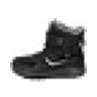

In [85]:
X_sample = X_train[0].reshape(28, 28)  # first image in the training set
plt.figure(figsize=(1,1))  # extra code – reduce the figure size
plt.imshow(X_sample, cmap="binary")
plt.axis('off')  # extra code – remove the axis
plt.show()

Ao roda o código acima deverá ver a bota de tornozelo representada no canto superior direito da [Figura 9-11](#figure-9-11) gerada pelo código abaixo.



Com o MNIST, quando o rótulo é igual a 5, significa que a imagem representa o dígito manuscrito 5. Fácil. Para o Fashion MNIST, no entanto, precisamos da lista de nomes das classes para saber com o que estamos lidando. O Scikit-Learn não a fornece, então vamos criá-la:

In [86]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

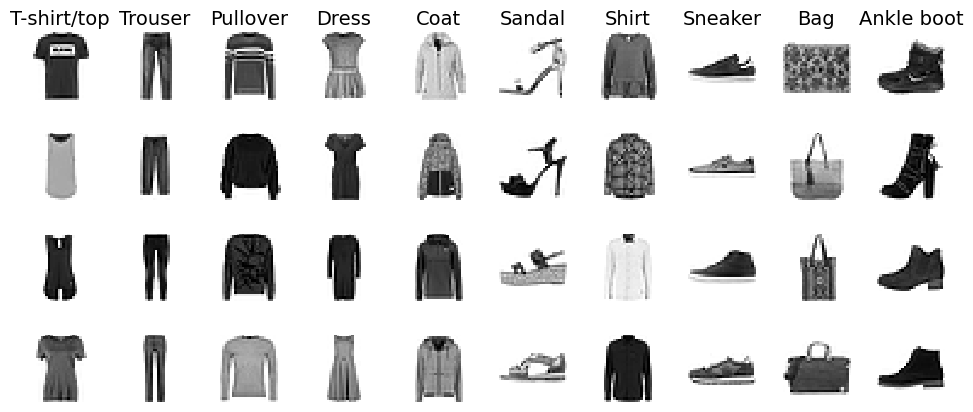

In [87]:
n_rows = 4
plt.figure(figsize=(12, n_rows * 1.2))
for row in range(n_rows):
    for class_index in range(10):
        X_img = X_train[y_train==class_index][row].reshape(28, 28)
        y_img = y_train[y_train==class_index][row]
        plt.subplot(n_rows, 10, 10 * row + class_index + 1)
        plt.imshow(X_img, cmap="binary", interpolation="nearest")
        plt.axis('off')
        if row == 0:
            plt.title(class_names[y_img])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

<a id="figure-9-11"></a>
**Figura 9-11. As quatro primeiras amostras de cada classe no Fashion MNIST**

Agora podemos confirmar que a primeira imagem no conjunto de treinamento representa uma bota de tornozelo:

In [88]:
class_names[y_train[0]]

'Ankle boot'

Estamos prontos para construir o MLP de classificação:

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

mlp_clf = MLPClassifier(hidden_layer_sizes=[200, 100], verbose=True,
                        early_stopping=True, random_state=42)
pipeline = make_pipeline(MinMaxScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)

Iteration 1, loss = 0.57483807
Validation score: 0.849333
Iteration 2, loss = 0.39938584
Validation score: 0.856833
Iteration 3, loss = 0.35435272
Validation score: 0.869333
Iteration 4, loss = 0.32570927
Validation score: 0.863833
Iteration 5, loss = 0.30588352
Validation score: 0.874167
Iteration 6, loss = 0.29053832
Validation score: 0.874000
Iteration 7, loss = 0.27455976
Validation score: 0.879333
Iteration 8, loss = 0.26407281
Validation score: 0.878500
Iteration 9, loss = 0.25317835
Validation score: 0.882167
Iteration 10, loss = 0.24414312
Validation score: 0.892833
Iteration 11, loss = 0.23601645
Validation score: 0.890000
Iteration 12, loss = 0.23008384
Validation score: 0.887333
Iteration 13, loss = 0.22123722
Validation score: 0.885167
Iteration 14, loss = 0.21190658
Validation score: 0.879333
Iteration 15, loss = 0.20617121
Validation score: 0.892667
Iteration 16, loss = 0.19935674
Validation score: 0.891667
Iteration 17, loss = 0.19323595
Validation score: 0.891667
Iterat

Este código é muito semelhante ao código de regressão que usamos anteriormente, mas há algumas diferenças:

*   Claro, é uma tarefa de classificação, então usamos um `MLPClassifier` em vez de um `MLPRegressor`.
*   Usamos apenas duas camadas ocultas com 300 e 100 neurônios, respectivamente. Você pode tentar um número diferente de camadas ocultas e alterar o número de neurônios também, se desejar.
*   Também usamos um `MinMaxScaler` em vez de um `StandardScaler`. Precisamos dele para reduzir as intensidades dos pixels para o intervalo de 0 a 1, em vez de 0 a 255: ter características nesse intervalo geralmente funciona melhor com os hiperparâmetros padrão usados pelo `MLPClassifier`, como sua taxa de aprendizado padrão e escala de inicialização de pesos. Você pode se perguntar por que não usamos um `StandardScaler`? Bem, alguns pixels não variam muito entre as imagens; por exemplo, os pixels ao redor das bordas são quase sempre brancos. Se usássemos o `StandardScaler`, esses pixels seriam escalados para ter a mesma variância que todos os outros pixels: como resultado, daríamos mais importância a esses pixels do que eles provavelmente merecem. Usar o `MinMaxScaler` geralmente funciona melhor do que o `StandardScaler` para imagens (mas seus resultados podem variar).
*   Por fim, a função `score()` retorna a acurácia do modelo.

Se você executar este código, descobrirá que o modelo atinge cerca de 89,7% de acurácia no conjunto de validação durante o treinamento (o valor exato é dado por `mlp_clf.best_validation_score_`),

In [90]:
mlp_clf.best_validation_score_

0.8965

 mas começa a sofrer um pouco de *overfitting* no final, terminando com apenas 89,4% de acurácia.

In [91]:
accuracy

0.8906

Quando avaliamos o modelo no conjunto de teste, obtemos 86,4%, o que não é ruim para essa tarefa, embora possamos fazer melhor com outras arquiteturas de redes neurais, como redes neurais convolucionais (ver [12 – Visão computacional profunda usando redes neurais convolucionais](./12_deep_computer_vision_with_cnns.ipynb)).

In [92]:
mlp_clf.score(X_test, y_test)

0.869


Você provavelmente percebeu que o treinamento foi bastante lento. Isso ocorre porque as camadas ocultas têm muitos parâmetros, portanto, há muitos cálculos a serem executados em cada iteração. Por exemplo, a primeira camada oculta tem 784 × 300 pesos de conexão, além de 300 termos de viés, o que soma 235.500 parâmetros! Todos esses parâmetros dão ao modelo bastante flexibilidade para se ajustar aos dados de treinamento, mas também significam que há um alto risco de sobreajuste, especialmente quando você não tem muitos dados de treinamento. Nesse caso, você pode usar técnicas de regularização, como parada antecipada e regularização ℓ2.

Uma vez que o modelo esteja treinado, você pode usá-lo para classificar novas imagens:

In [93]:
X_new = X_test[:15]  # let's pretend these are 15 new images
mlp_clf.predict(X_new)

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4])

Todas essas previsões estão corretas, exceto a do índice 12, que deveria ser um 7 (tênis) em vez de um 8 (bolsa).

In [94]:
y_test[:15]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4])

Você pode querer saber o quão confiante o modelo estava sobre essas previsões, especialmente a errada. Para isso, você pode usar `model.predict_proba()` em vez de `model.predict()`, como vsto em [03-Classificação](./03_classification.ipynb).

Observer abaixo as probabilidade vetores *one-hot* previstas para as mesmas imagens de teste:

In [95]:
y_proba = mlp_clf.predict_proba(X_new)
y_proba[12]

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 7.38799711e-140, 0.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 0.00000000e+000])

Isso pode melhorar: o modelo está nos dizendo que está 100% confiante de que a imagem representa uma bolsa (índice 8). Então, não apenas o modelo está errado, ele está 100% confiante de que está certo.

De fato, em todas as 10.000 imagens no conjunto de teste, existem apenas 16 imagens sobre as quais o modelo tem menos de 99,9% de confiança, apesar de sua acurácia ser de cerca de 90%.
- É por isso que você deve sempre tratar as probabilidades estimadas com cautela: redes neurais têm uma forte tendência a serem superconfiantes, especialmente se forem treinadas por muito tempo.

In [96]:
y_proba.shape

(15, 10)

No código abaixo usamos $0.99$ como limiar:

In [97]:
y_proba = mlp_clf.predict_proba(X_test)
(y_proba.max(axis=1) < 0.99).sum()

np.int64(18)

Mas na próxima célu a usamos $0.999$ (com **três** casas decimais)como limiar:

In [98]:
y_proba = mlp_clf.predict_proba(X_test)
(y_proba.max(axis=1) < 0.999).sum()

np.int64(25)

Como $0.999 > 0.99$, a segunda expressão geralmente resultará em uma contagem menor ou igual (menos amostras terão probabilidade máxima $< 0.999$, indicando maior confiança nas previsões).

 > Os alvos para tarefas de classificação podem ser índices de classe (por exemplo, 3) ou probabilidades de classe, como por exemplo, one-hot vectors (por exemplo, [0,0,0,1,0,0,0,0,0,0] para a classe 3). Mas se o seu modelo tende a ser superconfiante, você pode tentar a técnica de **suavização de rótulos** ([*label smoothing*](https://arxiv.org/abs/1512.00567)): reduza ligeiramente a probabilidade da classe alvo (por exemplo, de 1 para 0,9) e distribua o restante uniformemente entre as outras classes (por exemplo, [0,1/9, 0,1/9, 0,1/9, 0,9, 0,1/9, 0,1/9, 0,1/9, 0,1/9, 0,1/9, 0,1/9]).

Ainda assim, obter 90% de acurácia no Fashion MNIST é muito bom. Você poderia obter um desempenho ainda melhor ajustando os hiperparâmetros, por exemplo, usando `RandomizedSearchCV`, como fizemos em [02 - Projeto completo de aprendizado de máquina](./02_end_to_end_machine_learning_project.ipynb). No entanto, o espaço de busca é bastante grande, então ajuda saber aproximadamente onde procurar.

## Diretrizes de Ajuste de Hiperparâmetros

A flexibilidade das redes neurais é também uma das suas principais desvantagens: existem muitos hiperparâmetros para ajustar. Não só você pode usar qualquer arquitetura de rede imaginável, mas mesmo em um MLP básico você pode alterar o número de camadas, o número de neurônios e o tipo de função de ativação a ser usada em cada camada, a lógica de inicialização de pesos, o tipo de otimizador a ser usado, sua taxa de aprendizado, o tamanho do lote (*batch size*) e muito mais. Quais são alguns bons valores para esses hiperparâmetros?

### Número de Camadas Ocultas

Para muitos problemas, você pode começar com apenas uma única camada oculta e obterá resultados razoáveis. Um MLP com apenas uma camada oculta pode, teoricamente, modelar até as funções mais complexas, desde que tenha neurônios suficientes. Mas para problemas complexos, redes profundas têm uma eficiência de parâmetros muito maior do que as rasas: elas podem modelar funções complexas usando exponencialmente menos neurônios do que redes rasas, permitindo que alcancem um desempenho muito melhor com a mesma quantidade de dados de treinamento.

Isso ocorre porque sua estrutura em camadas permite reutilizar e compor características em vários níveis: por exemplo, a primeira camada em um classificador facial pode aprender a reconhecer características de baixo nível, como pontos, arcos ou linhas retas; enquanto a segunda camada pode aprender a combinar essas características de baixo nível em características de nível superior, como quadrados ou círculos; e a terceira camada pode aprender a combinar essas características de nível superior em uma boca, um olho ou um nariz; e a camada superior seria então capaz de usar essas características de nível superior para classificar rostos.

Essa arquitetura hierárquica não apenas ajuda as DNNs a convergirem mais rapidamente para uma boa solução, mas também melhora sua capacidade de generalizar para novos conjuntos de dados. Por exemplo, se você já treinou um modelo para reconhecer rostos em fotos e agora deseja treinar uma nova rede neural para reconhecer penteados, pode iniciar o treinamento reutilizando as camadas inferiores da primeira rede. Em vez de inicializar aleatoriamente os pesos e vieses das primeiras camadas da nova rede neural, você pode inicializá-los com os valores dos pesos e vieses das camadas inferiores da primeira rede. Dessa forma, a rede não precisará aprender do zero todas as estruturas de baixo nível que ocorrem na maioria das fotos; ela só precisará aprender as estruturas de nível superior (por exemplo, penteados). Isso é chamado de aprendizado por transferência (*transfer learning*).


Em resumo, para muitos problemas, você pode começar com apenas uma ou duas camadas ocultas, e a rede neural funcionará muito bem. Por exemplo, você pode facilmente atingir mais de 97% de precisão no conjunto de dados MNIST usando apenas uma camada oculta com algumas centenas de neurônios e mais de 98% de precisão usando duas camadas ocultas com o mesmo número total de neurônios, em aproximadamente o mesmo tempo de treinamento. Para problemas mais complexos, você pode aumentar o número de camadas ocultas até começar a sobreajustar o conjunto de treinamento. Tarefas muito complexas, como classificação de imagens grandes ou reconhecimento de fala, normalmente requerem redes com dezenas de camadas (ou até centenas, mas não totalmente conectadas, como você pode ver em [12 – Visão computacional profunda usando redes neurais convolucionais](./12_deep_computer_vision_with_cnns.ipynb), e precisam de uma enorme quantidade de dados de treinamento. Raramente você terá que treinar essas redes do zero: é muito mais comum reutilizar partes de uma rede de última geração pré-treinada que executa uma tarefa semelhante. O treinamento será então muito mais rápido e exigirá muito menos dados.

### Número de Neurônios por Camada Oculta

O número de neurônios nas camadas de entrada e saída é determinado pelo tipo de entrada e saída que sua tarefa requer. Por exemplo, a tarefa MNIST requer 28 × 28 = 784 entradas e 10 neurônios de saída.

Quanto às camadas ocultas, costumava ser comum dimensioná-las para formar uma pirâmide, com cada vez menos neurônios em cada camada — a lógica sendo que muitas características de baixo nível podem coalescer em muito menos características de alto nível. Uma rede neural típica para o MNIST poderia ter 3 camadas ocultas, a primeira com 300 neurônios, a segunda com 200 e a terceira com 100. No entanto, essa prática foi amplamente abandonada porque parece que usar o mesmo número de neurônios em todas as camadas ocultas funciona tão bem quanto na maioria dos casos, ou até melhor; além disso, há apenas um hiperparâmetro para ajustar, em vez de um por camada. Dito isso, dependendo do conjunto de dados, às vezes pode ajudar tornar a primeira camada oculta um pouco maior que as outras.

Assim como o número de camadas, você pode tentar aumentar o número de neurônios gradualmente até que a rede comece a ter *overfitting*. Alternativamente, você pode tentar construir um modelo com um pouco mais de camadas e neurônios do que você realmente precisa, e então usar a parada antecipada (*early stopping*) e outras técnicas de regularização para evitar que ele sofra *overfitting* em excesso. Vincent Vanhoucke, um pesquisador da Waymo e ex-Googler, apelidou isso de abordagem da "calça elástica": em vez de perder tempo procurando calças que correspondam perfeitamente ao seu tamanho, apenas use calças elásticas grandes que encolherão até o tamanho certo. Com essa abordagem, você evita camadas de gargalo que poderiam arruinar seu modelo. De fato, se uma camada tiver poucos neurônios, ela não terá a capacidade computacional para modelar relacionamentos complexos e pode nem mesmo ter poder representacional suficiente para preservar todas as informações úteis das entradas.

Por exemplo, se você aplicar PCA (apresentado no em [Redução de Dimensionalidade](./07_dimensionality_reduction.ipynb)) ao conjunto de treinamento Fashion MNIST, verá que são necessárias 187 dimensões para preservar 95% da variância nos dados. Portanto, se você definir o número de neurônios na primeira camada oculta para um número maior, digamos 200, poderá ter certeza de que essa camada não será um gargalo. No entanto, não é recomendável adicionar muitos neurônios,
pois o modelo terá muitos parâmetros para otimizar e levará mais tempo e dados para treinar.

> In general, you will get more bang for your buck by increasing the number of layers rather than the number of neurons per layer.

Dito isso, as camadas de gargalo nem sempre são algo negativo. Por exemplo, limitar a dimensionalidade das primeiras camadas ocultas força a rede neural a manter apenas as dimensões mais importantes, o que pode eliminar parte do ruído nos dados (mas não exagere!). Além disso, ter uma camada de gargalo perto da camada de saída pode forçar a rede neural a aprender boas representações dos dados nas camadas anteriores (ou seja, compactar mais informações úteis em menos espaço), o que pode ajudar a rede neural a generalizar e também pode ser útil por si só para o aprendizado de representação. Voltaremos a esse assunto em [18 – Autoencoders, GANs e modelos de difusão](./18_autoencoders_gans_and_diffusion_models.ipynb).

### Taxa de Aprendizado (*Learning Rate*)

A taxa de aprendizado é um hiperparâmetro extremamente importante. Em geral, a taxa de aprendizado ideal é cerca de metade da taxa de aprendizado máxima (ou seja, a taxa de aprendizado acima da qual o algoritmo de treinamento diverge, como vimos em [04-Treinando Modelos](./04_training_linear_models.ipynb)). Uma maneira de encontrar uma boa taxa de aprendizado é treinar o modelo por algumas centenas de iterações, começando com uma taxa de aprendizado muito baixa (por exemplo, $10^{-5}$) e aumentando-a gradualmente até um valor muito grande (por exemplo, 10). Isso é feito multiplicando a taxa de aprendizado por um fator constante a cada iteração. Se você plotar a perda como uma função da taxa de aprendizado (usando uma escala logarítmica para a taxa de aprendizado), você deve vê-la caindo no início. Mas depois de um tempo, a taxa de aprendizado será muito alta, então a perda disparará novamente: a taxa de aprendizado ideal geralmente é um pouco menor do que o ponto em que a perda começa a subir (tipicamente cerca de 10 vezes menor que o ponto de virada). Você pode então reinicializar seu modelo e treiná-lo normalmente usando essa boa taxa de aprendizado.

> Para alterar a taxa de aprendizado durante o treinamento ao usar o Scikit-Learn, você deve definir o hiperparâmetro `warm_start` do MLP como `True` e ajustar o modelo um lote de cada vez usando `partial_fit()`, muito parecido com o que fizemos com o `SGDRegressor` em [04-Treinando Modelos](./04_training_linear_models.ipynb). Basta atualizar a taxa de aprendizado a cada iteração.

### Tamanho do Lote (*Batch Size*)

O tamanho do lote pode ter um impacto significativo no desempenho do seu modelo e no tempo de treinamento. O principal benefício de usar grandes tamanhos de lote é que aceleradores de hardware como GPUs podem processá-los de forma eficiente (como veremos em [10 – Desenvolvendo Redes Neurais com PyTorch](./10_neural_nets_with_pytorch.ipynb)), de modo que o algoritmo de treinamento verá mais instâncias por segundo. Portanto, muitos pesquisadores e praticantes recomendam usar o maior tamanho de lote que couber na VRAM (memória de vídeo, ou seja, a memória da GPU). Há um porém, no entanto: grandes tamanhos de lote às vezes podem levar a instabilidades no treinamento, especialmente com modelos menores e no início do treinamento, e o modelo resultante pode não generalizar tão bem quanto um modelo treinado com um tamanho de lote pequeno. Yann LeCun tuitou certa vez: "Amigos não deixam amigos usar minilotes maiores que 32", citando um [artigo de 2018](https://arxiv.org/abs/1804.07612) de Dominic Masters e Carlo Luschi que concluiu que usar lotes pequenos (de 2 a 32) era preferível porque lotes pequenos levavam a melhores modelos em menos tempo de treinamento.

No entanto, outras pesquisas apontam na direção oposta. Por exemplo, em 2017, artigos de [Elad Hoffer et al.16](./https://arxiv.org/abs/1705.08741) e [Priya Goyal et al.17](https://arxiv.org/abs/1706.02677) mostraram que é possível usar tamanhos de lote muito grandes (até 8.192), juntamente com várias técnicas, como aquecimento da taxa de aprendizagem (ou seja, iniciar o treinamento com uma taxa de aprendizagem pequena e, em seguida, aumentá-la), para obter tempos de treinamento muito curtos, sem qualquer lacuna de generalização.

Portanto, uma estratégia é usar um tamanho de lote grande, possivelmente com aquecimento da taxa de aprendizagem, e se o treinamento for instável ou o desempenho final for decepcionante, tente usar um tamanho de lote menor.

### Outros Hiperparâmetros

Aqui estão mais dois hiperparâmetros que você pode ajustar se tiver o orçamento computacional e o tempo:

*   **Otimizador:** Escolher um otimizador melhor do que o bom e velho gradiente descendente em minilotes (e ajustar seus hiperparâmetros) pode ajudar a acelerar o treinamento e, às vezes, alcançar um desempenho melhor.
*   **Função de Ativação:** Discutimos como escolher a função de ativação anteriormente nesta aula: em geral, a função de ativação ReLU é um bom padrão para todas as camadas ocultas. Em alguns casos, substituir a ReLU por outra função pode ajudar.

> A taxa de aprendizado ideal depende dos outros hiperparâmetros — especialmente do tamanho do lote — então, se você modificar qualquer hiperparâmetro, certifique-se de ajustar a taxa de aprendizado novamente.

Para mais melhores práticas sobre o ajuste de hiperparâmetros de redes neurais, confira o excelente artigo de 2018 de Leslie Smith. O *Deep Learning Tuning Playbook* dos pesquisadores do Google também vale muito a leitura. O e-book gratuito *Machine Learning Yearning* de Andrew Ng também contém uma riqueza de conselhos práticos.

# Exercícios

## 1.
O [*neural network playground*](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.44201&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) é uma ótima ferramenta para construir suas intuições sem escrever nenhum código (ele foi construído pela equipe do TensorFlow, mas não há nada específico do TensorFlow nele; de fato, ele nem sequer usa TensorFlow). Neste exercício, você treinará vários classificadores binários com apenas alguns cliques e ajustará a arquitetura do modelo e seus hiperparâmetros para ganhar alguma intuição sobre como as redes neurais funcionam e o que seus hiperparâmetros fazem. Reserve um tempo para explorar o seguinte:
*   **a.** Os padrões aprendidos por uma rede neural. Tente treinar a rede neural padrão clicando no botão *Run* (canto superior esquerdo). Observe como ela encontra rapidamente uma boa solução para a tarefa de classificação. Os neurônios na primeira camada oculta aprenderam padrões simples, enquanto os neurônios na segunda camada oculta aprenderam a combinar os padrões simples da primeira camada oculta em padrões mais complexos. Em geral, quanto mais camadas houver, mais complexos os padrões podem ser.
*   **b.** Funções de ativação. Tente substituir a função de ativação *tanh* por uma função de ativação *ReLU* e treine a rede novamente. Observe que ela encontra uma solução ainda mais rápido, mas desta vez as fronteiras são lineares. Isso se deve ao formato da função ReLU.
*   **c.** O risco de mínimos locais. Modifique a arquitetura da rede para ter apenas uma camada oculta com três neurônios. Treine-a várias vezes (para redefinir os pesos da rede, clique no botão *Reset* ao lado do botão *Play*). Observe que o tempo de treinamento varia muito e, às vezes, ela até fica presa em um mínimo local.
*   **d.** O que acontece quando as redes neurais são muito pequenas. Remova um neurônio para manter apenas dois. Observe que a rede neural agora é incapaz de encontrar uma boa solução, mesmo que você tente várias vezes. O modelo tem poucos parâmetros e sofre sistematicamente de *underfitting* no conjunto de treinamento.
*   **e.** O que acontece quando as redes neurais são grandes o suficiente. Defina o número de neurônios para oito e treine a rede várias vezes. Observe que ela agora é consistentemente rápida e nunca fica presa. Isso destaca uma descoberta importante na teoria das redes neurais: grandes redes neurais raramente ficam presas em mínimos locais e, mesmo quando ficam, esses ótimos locais são frequentemente quase tão bons quanto o ótimo global. No entanto, elas ainda podem ficar presas em longos platôs por um longo tempo.
*   **f.** O risco do desaparecimento dos gradientes (*vanishing gradients*) em redes profundas. Selecione o conjunto de dados espiral (o conjunto de dados inferior direito em "DATA") e altere a arquitetura da rede para ter quatro camadas ocultas com oito neurônios cada. Observe que o treinamento leva muito mais tempo e frequentemente fica preso em platôs por longos períodos. Observe também que os neurônios nas camadas mais altas (à direita) tendem a evoluir mais rápido do que os neurônios nas camadas mais baixas (à esquerda). Esse problema, chamado de problema do desaparecimento dos gradientes, pode ser amenizado com uma melhor inicialização de pesos e outras técnicas, melhores otimizadores (como AdaGrad ou Adam) ou *batch normalization* (discutido em [11 – Treinando Redes Neurais Profundas](./11_training_deep_neural_networks.ipynb)).
*   **g.** Vá além. Tire uma hora ou mais para brincar com outros parâmetros e sentir o que eles fazem para construir uma compreensão intuitiva sobre redes neurais.

## 2.
Desenhe uma ANN usando os neurônios artificiais originais (como os da [Figura 9-3](#figure-9-3)) que calcula $A \oplus B$ (onde $\oplus$ representa a operação XOR). Dica: $A \oplus B = (A \land \neg B) \lor (\neg A \land B)$.

## 3.
Por que é geralmente preferível usar um classificador de regressão logística em vez de um perceptron clássico (ou seja, uma única camada de unidades lógicas de limiar treinadas usando o algoritmo de treinamento do perceptron)? Como você pode ajustar um perceptron para torná-lo equivalente a um classificador de regressão logística?

## 4.
Por que a função de ativação sigmoide foi um ingrediente chave no treinamento dos primeiros MLPs?

## 5.
Cite três funções de ativação populares. Você consegue desenhá-las?

## 6.
Suponha que você tenha um MLP composto por uma camada de entrada com 10 neurônios de passagem (*passthrough*), seguida por uma camada oculta com 50 neurônios artificiais e, finalmente, uma camada de saída com 3 neurônios artificiais. Todos os neurônios artificiais usam a função de ativação ReLU.
*   **a.** Qual é o formato da matriz de entrada $\mathbf{X}$?
*   **b.** Quais são os formatos da matriz de pesos da camada oculta $\mathbf{W}_h$ e do vetor de viés $\mathbf{b}_h$?
*   **c.** Quais são os formatos da matriz de pesos da camada de saída $\mathbf{W}_o$ e do vetor de viés $\mathbf{b}_o$?
*   **d.** Qual é o formato da matriz de saída da rede $\mathbf{Y}$?
*   **e.** Escreva a equação que calcula a matriz de saída da rede $\mathbf{Y}$ como uma função de $\mathbf{X}$, $\mathbf{W}_h$, $\mathbf{b}_h$, $\mathbf{W}_o$ e $\mathbf{b}_o$.

## 7.
Quantos neurônios você precisa na camada de saída se quiser classificar emails em spam ou ham? Qual função de ativação você deve usar na camada de saída? Se, em vez disso, você quiser abordar o MNIST, quantos neurônios você precisa na camada de saída e qual função de ativação deve usar? E para fazer sua rede prever preços de imóveis?

## 8.
O que é *backpropagation* e como funciona? Qual é a diferença entre *backpropagation* e *reverse-mode autodiff*?

## 9.
Você pode listar todos os hiperparâmetros que pode ajustar em um MLP básico? Se o MLP sofrer de *overfitting* nos dados de treinamento, como você poderia ajustar esses hiperparâmetros para tentar resolver o problema?


## 10.
Treine um MLP profundo no conjunto de dados CoverType. Você pode carregá-lo usando `sklearn.datasets.fetch_covtype()`. Veja se consegue obter mais de 93% de acurácia no conjunto de teste ajustando os hiperparâmetros manualmente e/ou usando `RandomizedSearchCV`.

## REFERÊNCIAS

- Aurélien Géron. *Hands-On Machine Learning with Scikit-Learn and PyTorch*. O'Reilly Media, 2025. Disponível em: [https://ageron.github.io/](https://ageron.github.io/).
- Sebastian Raschka. *Machine Learning with PyTorch and Scikit-Learn*. Packt Publishing, 2022. Disponível em:
[https://sebastianraschka.com/blog/2022/ml-pytorch-book.html](https://sebastianraschka.com/blog/2022/ml-pytorch-book.html)
- Tivadar Danka. *Mathematics of Machine Learning*. Packt Publishing, 2025. Disponível em:[https://www.packtpub.com/en-us/product/mathematics-of-machine-learning-9781837027866](https://www.packtpub.com/en-us/product/mathematics-of-machine-learning-9781837027866)